# PROJECT 3- Term Deposit Subscription Prediction
## Aaron Coteff 10.31.2020
### GreatLearning AI/ML

## The data is related with direct marketing campaigns offering a term deposit with a Portuguese banking institution. A term deposit is a fixed-term investment where money is locked up for some set period of time, usually short-term. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess if the bank term deposit would or would not be subscribed. 

# Import Data, Libraries and Conduct Inspection of Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', 250)
sns.set(color_codes = True)
sns.set_style(style='darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score, roc_curve

import datetime
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.4f}'.format 

In [2]:
df = pd.read_csv('bank-full.csv')

In [3]:
df_copy = pd.read_csv('bank-full.csv')

In [4]:
df.shape

(45211, 17)

In [5]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [6]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,"45,211.0000",40.9362,10.6188,18.0000,33.0000,39.0000,48.0000,95.0000
balance,"45,211.0000","1,362.2721","3,044.7658","-8,019.0000",72.0000,448.0000,"1,428.0000","102,127.0000"
day,"45,211.0000",15.8064,8.3225,1.0000,8.0000,16.0000,21.0000,31.0000
duration,"45,211.0000",258.1631,257.5278,0.0000,103.0000,180.0000,319.0000,"4,918.0000"
campaign,"45,211.0000",2.7638,3.0980,1.0000,1.0000,2.0000,3.0000,63.0000
pdays,"45,211.0000",40.1978,100.1287,-1.0000,-1.0000,-1.0000,-1.0000,871.0000
previous,"45,211.0000",0.5803,2.3034,0.0000,0.0000,0.0000,0.0000,275.0000


In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [9]:
df.duplicated().any()

False

### We see that the data lacks any missing values and there are no duplicates within the dataset. At first glance we see a number of attributes that are apparently right skewed, the most affected being pdays, balance, and duration.

# EDA

# Summary Description of Individual Attributes

In [10]:
defs = {
    'age': 'Age of Client (Continuous)', 
    'job': 'Type of Job Held by Client (Categorical)',
    'marital': 'Marital Status of Client (Categorical)',
    'education': 'Education Level of Client (Categorical)',
    'default': 'Does Client Have a Loan/Credit Left Unpaid? (Categorical)',
    'balance': "Amount Held in Client's Account (Continuous)",
    'housing': 'Does Client Have a Housing Loan? (Categorical)',
    'loan': 'Does Client Have a Personal Loan? (Categorical)',
    'contact': 'Contact Communication Type (Categorical)',
    'day': 'Day Of Month of Last Contact (Categorical)',
    'month': 'Month of Last Contact (Categorical)',
    'duration': 'Length of Last Call with Client in Seconds (Numeric)',
    'campaign': 'Number of Contacts Performed During This Campaign and For This Client Including Last Contact (Numeric)',
    'pdays': 'Number of Days That Passed by After The Client Was Last Contacted from a Previous Campaign. -1 Represents No Contact or Over 900 Days',
    'previous': 'Number of Contacts Performed Before This Campaign and For This Client (Numeric)',
    'poutcome': 'Outcome of The Previous Marketing Campaign (Categorical)',
    'Target': 'Has The Client Subscribed a Term Deposit? (Binary)'
}

In [11]:
for i in df.columns:
    print()
    print('Independant Attribute:')
    print()
    print('\t', i)
    print()
    print('Description:')
    print()
    print('\t',defs[i])     
    print()
    print('Range Of Values:')
    print()
    print('\t From', df[i].min(), 'To', df[i].max())
    print()
    print('Values:')
    print()
    print('\t', df[i].unique())
    print()
    print('Data Type:')
    print()
    print('\t', df.dtypes[i])
    print()
    print('******************************')


Independant Attribute:

	 age

Description:

	 Age of Client (Continuous)

Range Of Values:

	 From 18 To 95

Values:

	 [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]

Data Type:

	 int64

******************************

Independant Attribute:

	 job

Description:

	 Type of Job Held by Client (Categorical)

Range Of Values:

	 From admin. To unknown

Values:

	 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Data Type:

	 object

******************************

Independant Attribute:

	 marital

Description:

	 Marital Status of Client (Categorical)

Range Of Values:

	 From divorced To single

Values:

	 ['married' 'single' 'divorced']

Data Type:

	 object

******************************

Indep

# Creating Additional Attributes

## Creating Year Column

### We know that the data is ordered by date, beginning in May of 2008, and ending in November of 2010.  We can see this by adding an 'id' column with which we reference each call with respect to the month it was made in. We see the months cycle through the dataset, and therefore through time. We can therefore determine the year that these calls were made, as well as the day of the week that it was made. It may be of significance to determine the day of the week that  call was made to better understand our target variable, namely, a successful campaign. 

In [12]:
df["id"] = df.index + 1

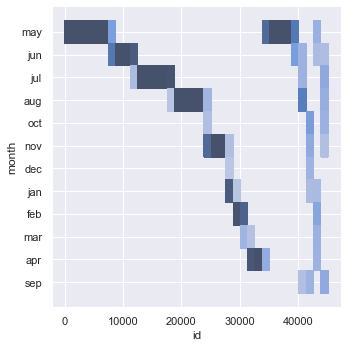

In [13]:
sns.displot(data = df, y = 'month', x = 'id');

### We can see that the majority of the last known calls were made in the first 12 months of this time period, and that no calls were made in September of the first year of calls.

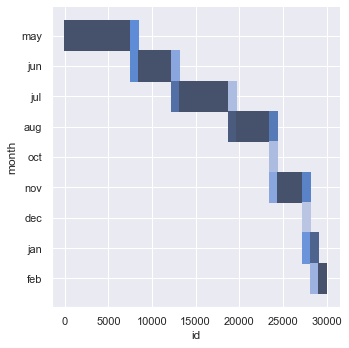

In [14]:
sns.displot(data = df[df['id']< 30000], y = 'month', x = 'id');

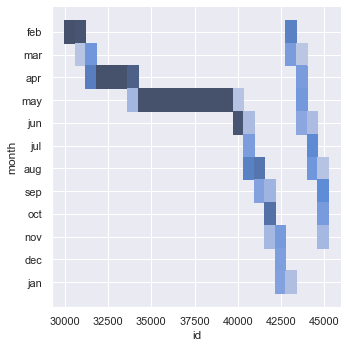

In [15]:
sns.displot(data = df[df['id']> 30000], y = 'month', x = 'id');

### We see that the majority of calls made in the second year were during May.

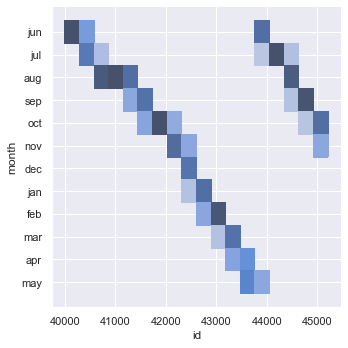

In [16]:
sns.displot(data = df[df['id']> 40000], y = 'month', x = 'id');

#### Jan 6 is the first call of 2010

In [17]:
df[df['id']> 42590].head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,id
42590,32,technician,married,unknown,no,14533,no,no,cellular,31,dec,646,3,198,2,success,no,42591
42591,38,blue-collar,married,secondary,no,863,no,no,unknown,6,jan,78,1,-1,0,unknown,no,42592
42592,29,services,single,secondary,no,814,no,no,unknown,6,jan,54,1,-1,0,unknown,no,42593


#### Dec 27 is the last call of 2008

In [18]:
df[df['id']>27728].head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,id
27728,28,admin.,single,secondary,no,6100,no,no,unknown,27,dec,333,1,-1,0,unknown,no,27729
27729,59,management,married,tertiary,no,2143,yes,no,cellular,28,jan,59,1,268,1,failure,no,27730
27730,40,management,married,tertiary,no,378,yes,yes,cellular,28,jan,260,1,268,2,failure,no,27731


#### Create year column

In [19]:
df['year'] = ['2008' if x < 27730 else '2009' if 27730<=x<42592 else '2010' for x in df.id]

In [20]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,id,year
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,2008
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,2,2008
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,3,2008
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,4,2008
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,5,2008


In [21]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,id,year
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,45207,2010
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,45208,2010
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,45209,2010
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,45210,2010
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no,45211,2010


In [22]:
df[df['id']> 42590].head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,id,year
42590,32,technician,married,unknown,no,14533,no,no,cellular,31,dec,646,3,198,2,success,no,42591,2009
42591,38,blue-collar,married,secondary,no,863,no,no,unknown,6,jan,78,1,-1,0,unknown,no,42592,2010
42592,29,services,single,secondary,no,814,no,no,unknown,6,jan,54,1,-1,0,unknown,no,42593,2010


In [23]:
df[df['id']>27728].head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,id,year
27728,28,admin.,single,secondary,no,6100,no,no,unknown,27,dec,333,1,-1,0,unknown,no,27729,2008
27729,59,management,married,tertiary,no,2143,yes,no,cellular,28,jan,59,1,268,1,failure,no,27730,2009
27730,40,management,married,tertiary,no,378,yes,yes,cellular,28,jan,260,1,268,2,failure,no,27731,2009


# Creating Last_Contacted, and Last_Day_Of_Week columns.

### Modify Month column to numerical value

In [24]:
months = {'jan': '01', 
          'feb': '02',
          'mar': '03',
          'apr': '04',
          'may': '05',
          'jun': '06',
          'jul': '07',
          'aug': '08',
          'sep': '09',
          'oct': '10',
          'nov': '11',
          'dec': '12'
}

df['month'] = df['month'].apply(lambda x: months[x])  

In [25]:
df['last_contacted'] = pd.to_datetime(df[['day', 'month', 'year']]) 

In [26]:
df['last_day_of_week']= pd.to_datetime(df['last_contacted']).dt.dayofweek

## Creating Previous_Contacted, and Previous_Day_Of_Week columns.

In [27]:
df['previous_contacted'] = df.pdays
df['previous_day_of_week'] = df.pdays
for i in df.index:
    if df['previous_contacted'].iloc[i] != -1:    
        df['previous_contacted'].iloc[i] = df.last_contacted.iloc[i] - pd.to_timedelta(df['pdays'].iloc[i], unit = 'd')
        df['previous_contacted'].iloc[i] = pd.to_datetime(df['previous_contacted'].iloc[i])
        df['previous_day_of_week'].iloc[i] = pd.to_datetime(df['previous_contacted'].iloc[i]).dayofweek

Last_Day_Of_Week Value Counts:

3    9754
0    9522
2    8914
4    8707
1    8264
5      30
6      20
Name: last_day_of_week, dtype: int64


Target,no,yes
last_day_of_week,,
0,0.8983,0.1017
1,0.8768,0.1232
2,0.8782,0.1218
3,0.8747,0.1253
4,0.8865,0.1135
5,0.9000,0.1000
6,0.8000,0.2000


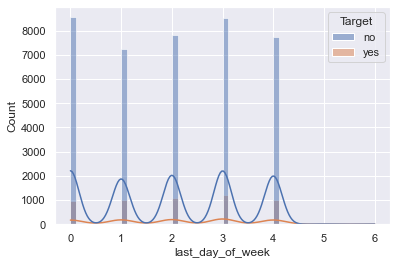

In [28]:
sns.histplot(data = df, x = 'last_day_of_week', kde = True, hue = 'Target');
print('Last_Day_Of_Week Value Counts:')
print()
print(df.last_day_of_week.value_counts())
pd.crosstab(df.last_day_of_week, df.Target, normalize = 'index')

Previous_Day_Of_Week Value Counts:

-1    36954
 3     1733
 0     1677
 1     1666
 2     1648
 4     1526
 6        4
 5        3
Name: previous_day_of_week, dtype: int64


Target,no,yes
previous_day_of_week,,
-1,0.9084,0.0916
0,0.7490,0.2510
1,0.7635,0.2365
2,0.7870,0.2130
3,0.7657,0.2343
4,0.7837,0.2163
5,0.6667,0.3333
6,0.5000,0.5000


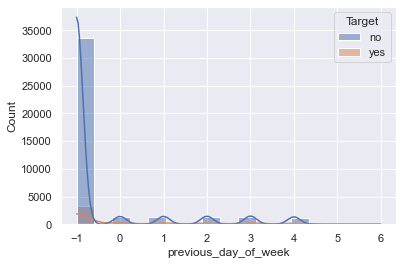

In [29]:
sns.histplot(data = df, x = 'previous_day_of_week', kde = True, hue = 'Target');
print('Previous_Day_Of_Week Value Counts:')
print()
print(df.previous_day_of_week.value_counts())
pd.crosstab(df.previous_day_of_week, df.Target, normalize = 'index')

## I believe that determining the day of the week the call was made may be as far as we can take the time attribues.  We can see above the small differences in successes with regard to which day calls were made. It would be helpful to know what time each call was placed to get an even better understanding how much that would affect the success of the campaign.

## Creating Duration_Minutes Attribute

In [30]:
df['duration_minutes'] = df['duration']/60
df['duration_minutes'] = df['duration_minutes'].round(2)

#### Creating the Duration_Minutes is a purely asthetic exercise for ease of understanding.

# Addressing attributes with unknown categories

Target            no    yes
job                        
admin.        0.8780 0.1220
blue-collar   0.9273 0.0727
entrepreneur  0.9173 0.0827
housemaid     0.9121 0.0879
management    0.8624 0.1376
retired       0.7721 0.2279
self-employed 0.8816 0.1184
services      0.9112 0.0888
student       0.7132 0.2868
technician    0.8894 0.1106
unemployed    0.8450 0.1550
unknown       0.8819 0.1181


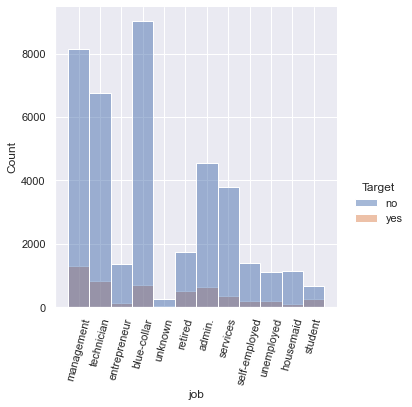

Target        no    yes
education              
primary   0.9137 0.0863
secondary 0.8944 0.1056
tertiary  0.8499 0.1501
unknown   0.8643 0.1357


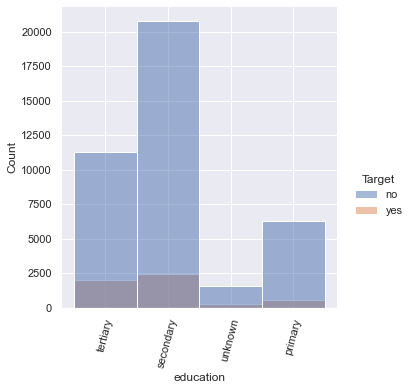

Target        no    yes
contact                
cellular  0.8508 0.1492
telephone 0.8658 0.1342
unknown   0.9593 0.0407


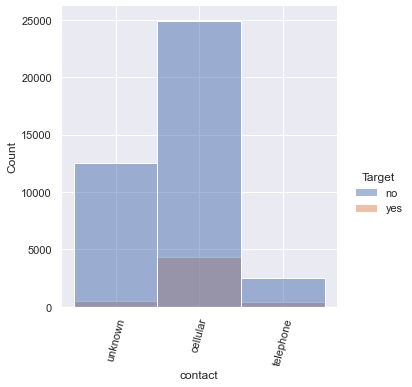

Target       no    yes
poutcome              
failure  0.8739 0.1261
other    0.8332 0.1668
success  0.3527 0.6473
unknown  0.9084 0.0916


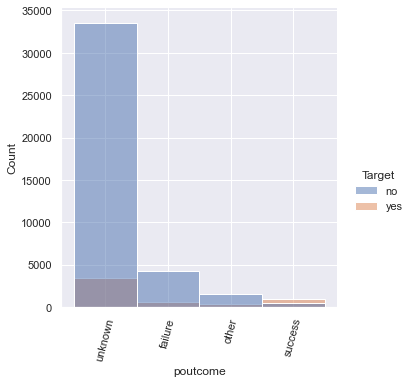

In [31]:
for i in df[['job', 'education', 'contact', 'poutcome']]:
    print(pd.crosstab(df[i], df['Target'], normalize = 'index'))
    sns.displot(data = df, x = df[i], hue = 'Target');
    plt.xticks(rotation=75)
    plt.show()

#### Looking at how even the relationship is between both 'cellular' and 'telephone' in the Contact attribute to our Target, and considering how incommensurate the 'unknown' values are to either of the others, we will drop this attribute from our models.

In [32]:
df.drop('contact', axis = 1, inplace = True)

#### For Education and Job, we combine our 'unknown' values with 'primary' and 'unemployed', respectfully. As 'primary' is the least given level of Education provided and individuals of unknown education level can be assumed to have primary education, so is 'unemployed' the least given level with respect to employment.

In [33]:
emap = {'unknown': 'primary'}
df['education'] = df['education'].replace(emap)

In [34]:
jmap = {'unknown': 'unemployed'}
df['job'] = df['job'].replace(jmap)

#### Poutcome is the odd one of the bunch, as it's 'unknown' values are the majority of the data. We will join 'unknown' with 'other' and preserve the defined known wins and known losses from the previous campaign.  It is worth noting that the 'success' attribute with respect to our Target is unlike any other we've seen.

In [35]:
pmap = {'unknown': 'other'}
df['poutcome'] = df['poutcome'].replace(pmap)

# Analysis of Attributes

# Age Attribute

Mean:
	 40.93621021432837

Median:

	 39.0

Standard Deviation:

	 10.618762040975431

Quartiles:

	 Q1: 33.0 
	 Q2/Median: 39.0 
	 Q3: 48.0 
	 IQR: 15.0

Min/Max:

	 18 / 95


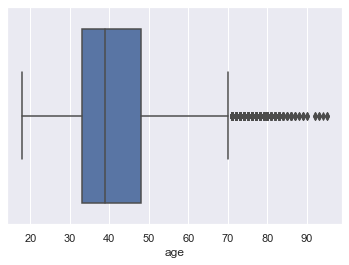

In [36]:
print('Mean:')
print('\t', df['age'].mean())
print()
print('Median:')
print()
print('\t', df['age'].median())
print()
print('Standard Deviation:')
print()
print('\t', df['age'].std())
print()
print('Quartiles:')
print()
print('\t Q1:', df.age.quantile(.25),'\n\t Q2/Median:', df.age.quantile(.5), '\n\t Q3:', df.age.quantile(.75),
      '\n\t IQR:', df.age.quantile(.75)-df.age.quantile(.25))
print()
print('Min/Max:')
print()
print('\t',df.age.min(), '/', df.age.max())
sns.boxplot(data = df, x = df['age']);
   

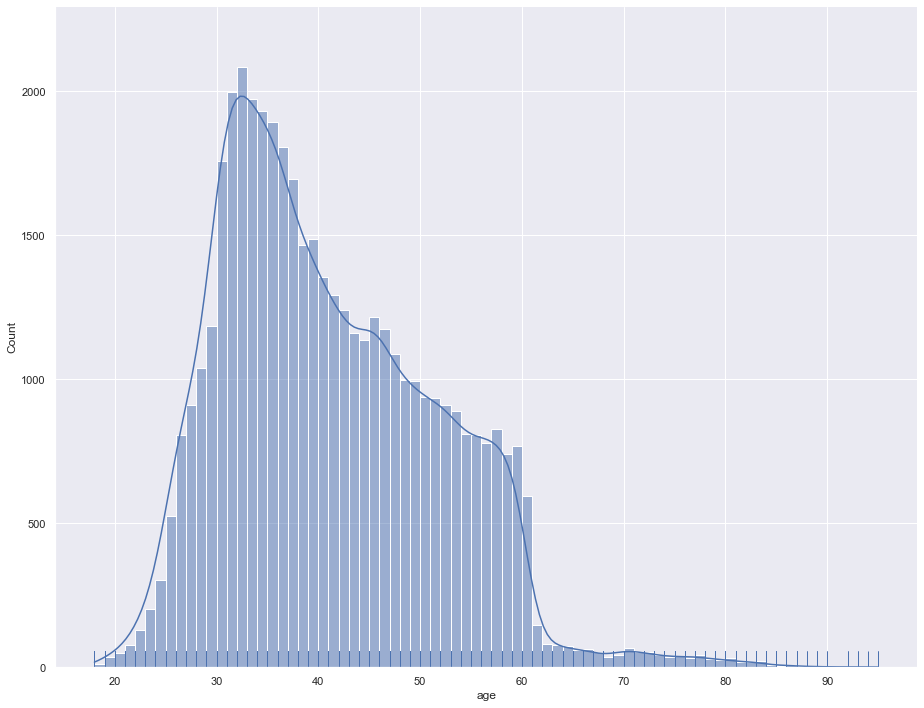

In [37]:
sns.displot(data = df, x = df['age'], height = 10, aspect = 1.3, rug = True, kde = True, bins = df.age.nunique());

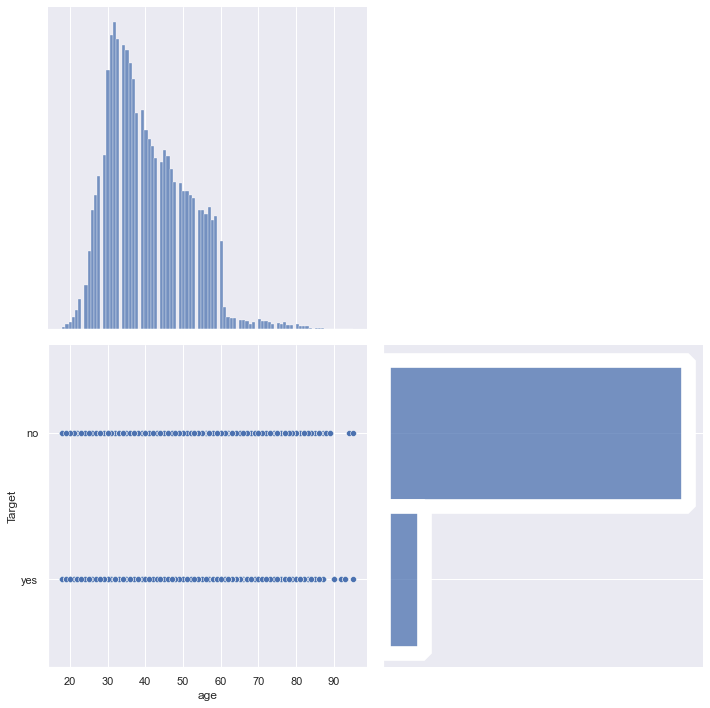

In [38]:
sns.jointplot(data = df, x = 'age', y = 'Target', height = 10, space = .05, ratio = 1);

### Age Outlier Data

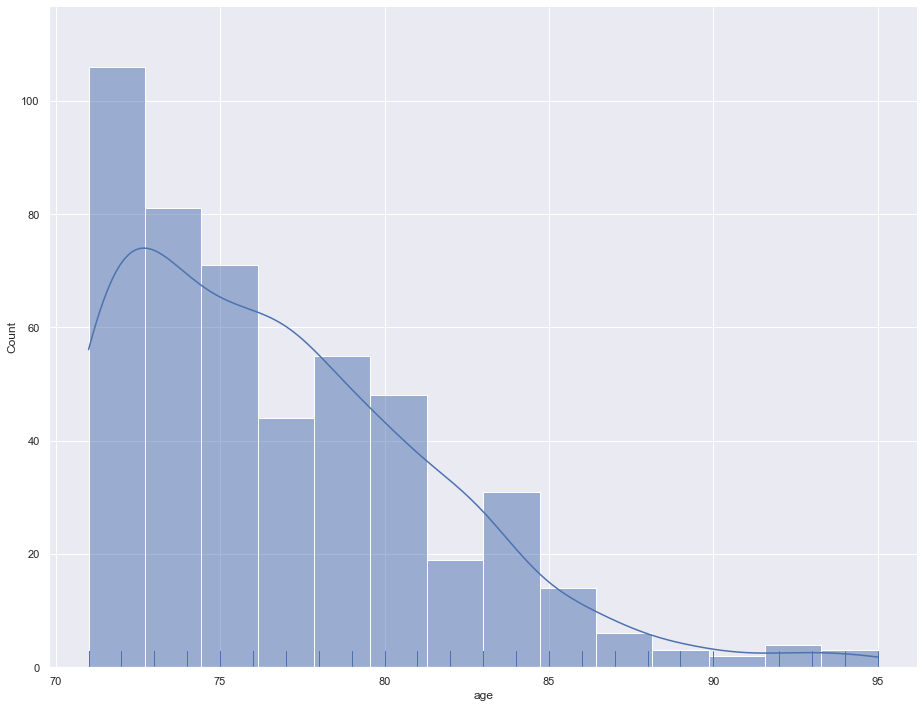

In [39]:
age_outliers = df[df['age'] > df.age.quantile(.75) + 1.5*(df.age.quantile(.75)-df.age.quantile(.25))]
sns.displot(data = age_outliers, x = age_outliers['age'], height = 10, aspect = 1.3, rug = True, kde = True);

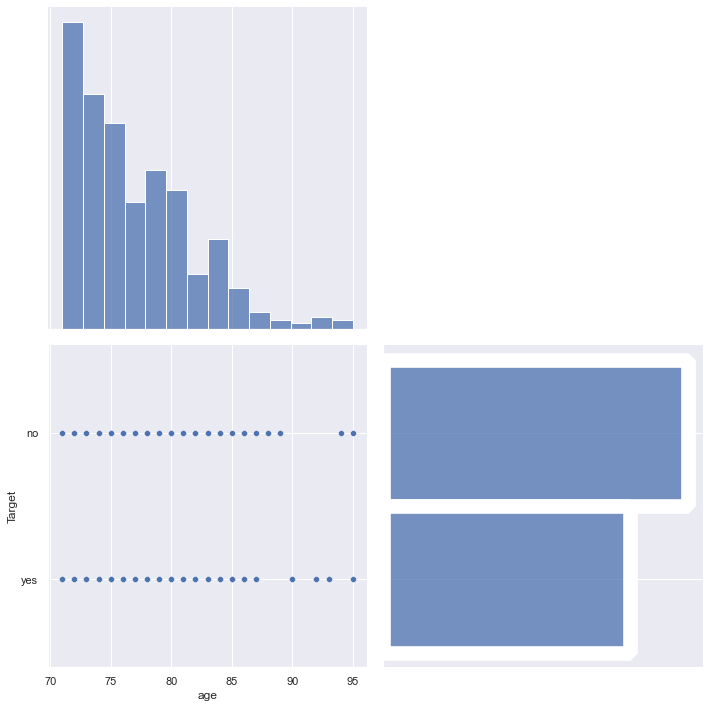

In [40]:
sns.jointplot(data = age_outliers, x = 'age', y = 'Target', height = 10, space = .05, ratio = 1);

### The 'Age' attribute is right skewed.  We observe a more even distribution between our Target variable and the outlying data than the data as a whole has. This distrbution seems in line with data found online stating that in 2010 Portugal had a median age of 41.6

### We divide this attribute into smaller subsets with increasing values for better translation into the machine learning algorithm

In [41]:
df['age_group'] = pd.cut(df['age'], [0,30, 40, 50, 60, 100], labels = ['1', '2', '3', '4', '5'])

# Balance Attribute

Mean:
	 1362.2720576850766

Median:

	 448.0

Standard Deviation:

	 3044.7658291686002

Quartiles:

	 Q1: 72.0 
	 Q2/Median: 448.0 
	 Q3: 1428.0 
	 IQR: 1356.0

Min/Max:

	 -8019 / 102127


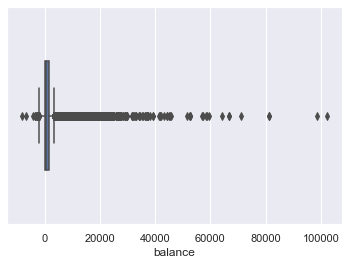

In [42]:
print('Mean:')
print('\t', df.balance.mean())
print()
print('Median:')
print()
print('\t', df.balance.median())
print()
print('Standard Deviation:')
print()
print('\t', df.balance.std())
print()
print('Quartiles:')
print()
print('\t Q1:', df.balance.quantile(.25),'\n\t Q2/Median:', df.balance.quantile(.5), '\n\t Q3:', df.balance.quantile(.75),
      '\n\t IQR:', df.balance.quantile(.75)-df.balance.quantile(.25))
print()
print('Min/Max:')
print()
print('\t',df.balance.min(), '/', df.balance.max())
sns.boxplot(data = df, x = df.balance, width = .5);


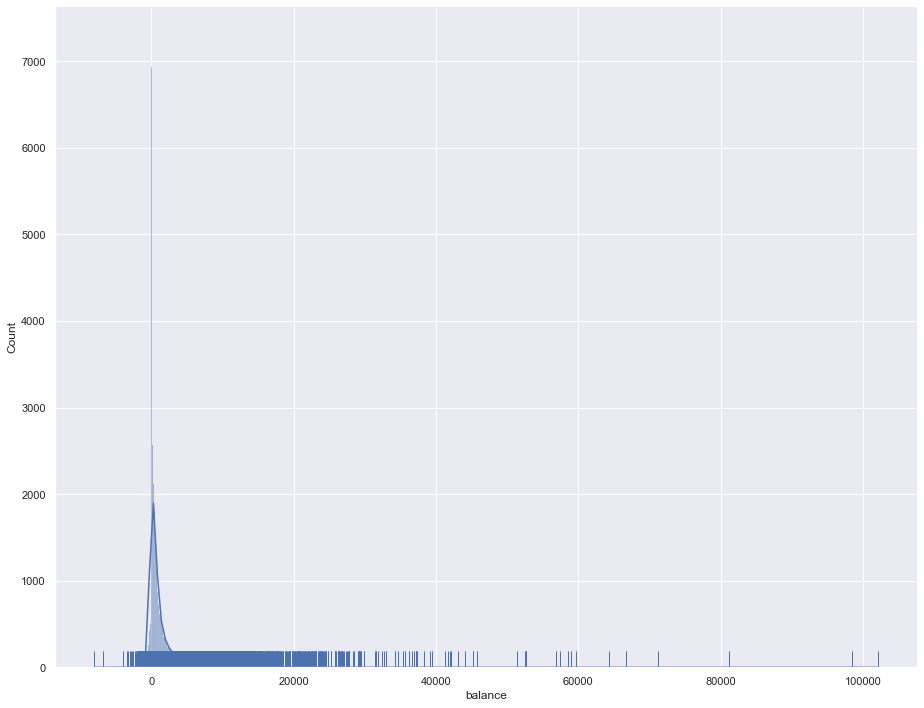

In [43]:
sns.displot(data = df, x = df.balance, height = 10, aspect = 1.3, rug = True, kde = True);

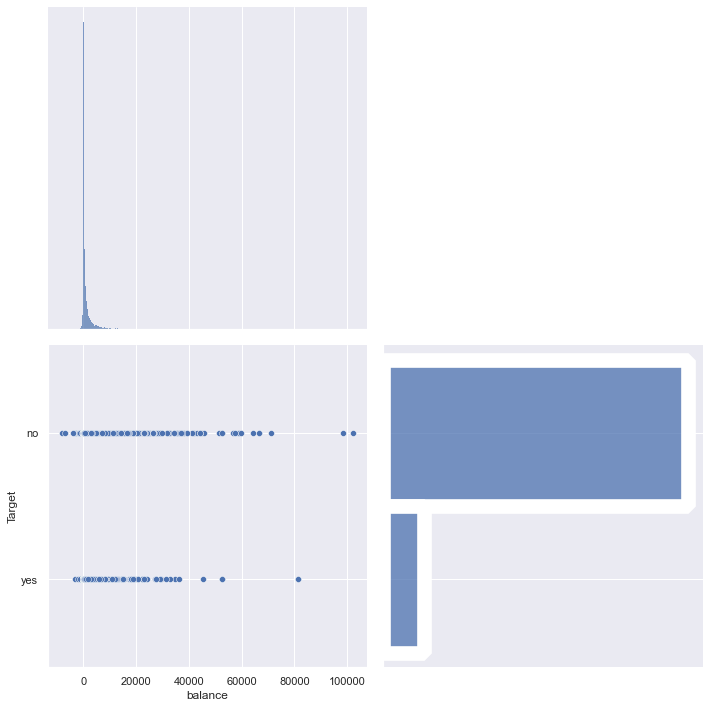

In [44]:
sns.jointplot(data = df, x = 'balance', y = 'Target', height = 10, space = .05, ratio = 1);

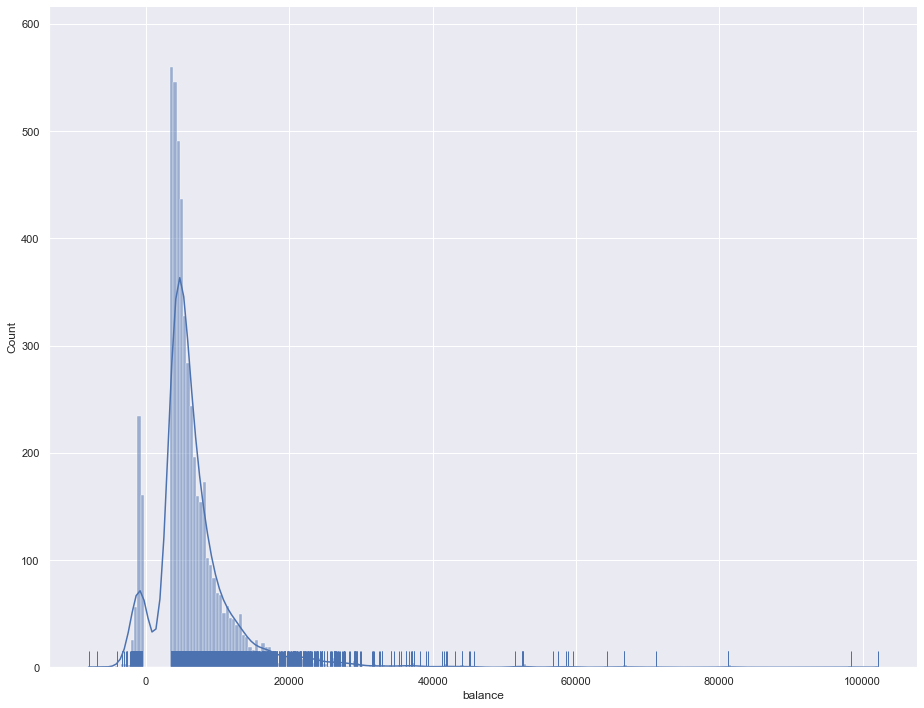

In [45]:
balance_outliers = df[(df['balance'] > df.balance.quantile(.75) + 1.5*(df.balance.quantile(.75)-df.balance.quantile(.25))) | (df['balance'] < df.balance.quantile(.75) - 1.5*(df.balance.quantile(.75)-df.balance.quantile(.25)))]
sns.displot(data = balance_outliers, x = balance_outliers['balance'], height = 10, aspect = 1.3, rug = True, kde = True);

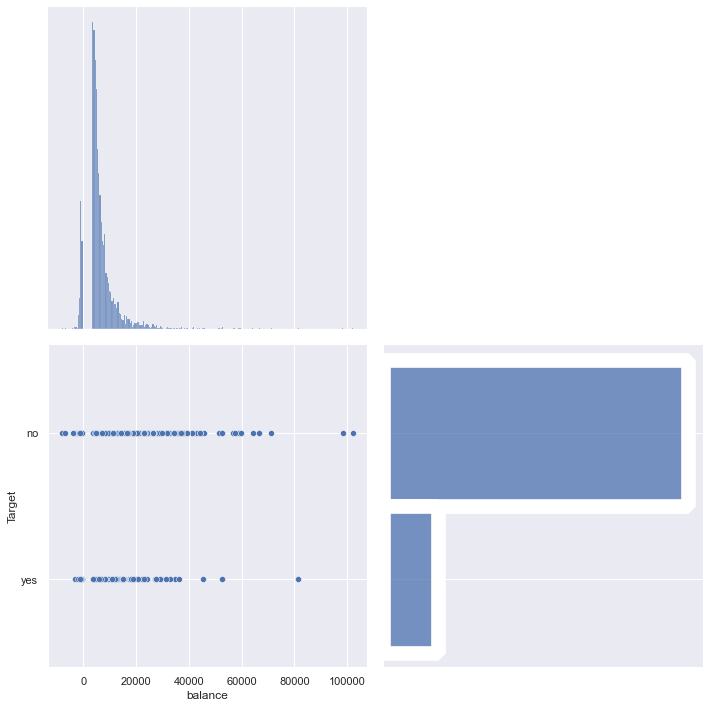

In [46]:
sns.jointplot(data = balance_outliers, x = 'balance', y = 'Target', height = 10, space = .05, ratio = 1);

### The 'Balance' attribute is right skewed. We see a similar distribution of our Target variable in both the outliers and the data as a whole. We preserve this data as it a valid representation of the actual economy.

# Day Attribute

Mean:
	 15.80641879188693

Median:

	 16.0

Standard Deviation:

	 8.322476153044185

Quartiles:

	 Q1: 8.0 
	 Q2/Median: 16.0 
	 Q3: 21.0 
	 IQR: 13.0

Min/Max:

	 1 / 31


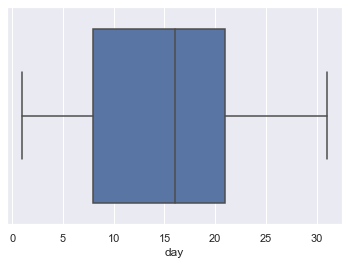

In [47]:
print('Mean:')
print('\t', df.day.mean())
print()
print('Median:')
print()
print('\t', df.day.median())
print()
print('Standard Deviation:')
print()
print('\t', df.day.std())
print()
print('Quartiles:')
print()
print('\t Q1:', df.day.quantile(.25),'\n\t Q2/Median:', df.day.quantile(.5), '\n\t Q3:', df.day.quantile(.75),
      '\n\t IQR:', df.day.quantile(.75)-df.day.quantile(.25))
print()
print('Min/Max:')
print()
print('\t',df.day.min(), '/', df.day.max())
sns.boxplot(data = df, x = df.day);

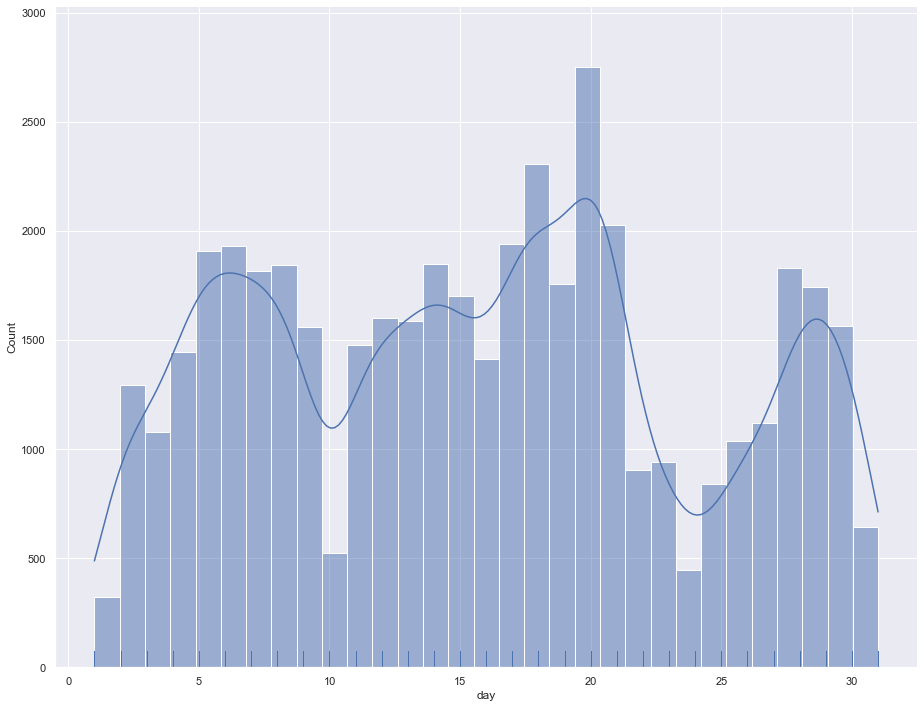

In [48]:
sns.displot(data = df, x = df.day, height = 10, aspect = 1.3, rug = True, kde = True, bins = df.day.nunique());

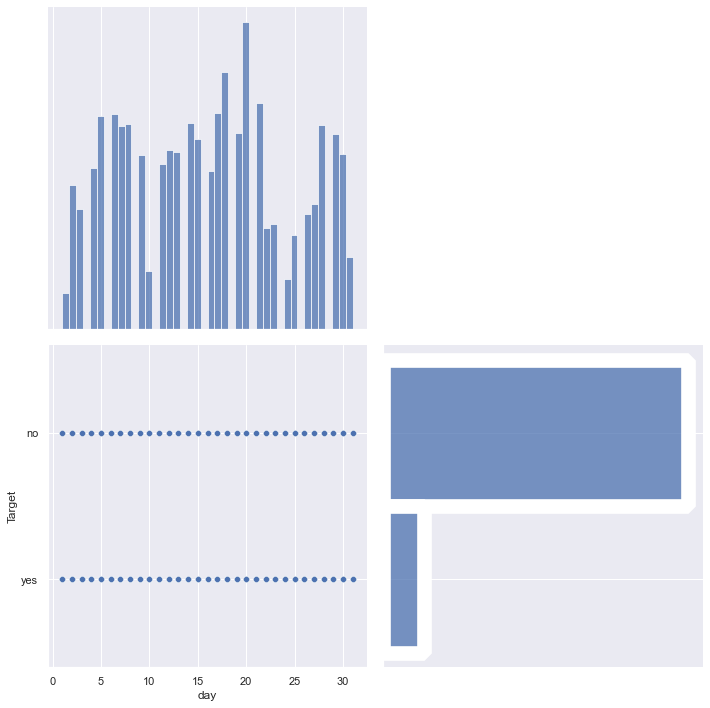

In [49]:
sns.jointplot(data = df, x = 'day', y = 'Target', height = 10, space = .05, ratio = 1);

### The 'Day' attribute has no outliers and does not tell us very much.

# Duration/Duration_Minutes Attribute

Mean:
	 4.3027285395147

Median:

	 3.0

Standard Deviation:

	 4.292132408331229

Quartiles:

	 Q1: 1.72 
	 Q2/Median: 3.0 
	 Q3: 5.32 
	 IQR: 3.6000000000000005

Min/Max:

	 0.0 / 81.97


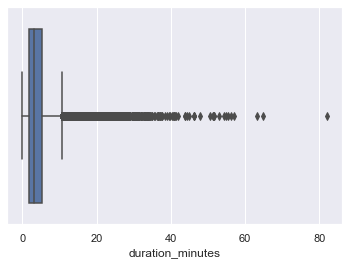

In [50]:
print('Mean:')
print('\t', df.duration_minutes.mean())
print()
print('Median:')
print()
print('\t', df.duration_minutes.median())
print()
print('Standard Deviation:')
print()
print('\t', df.duration_minutes.std())
print()
print('Quartiles:')
print()
print('\t Q1:', df.duration_minutes.quantile(.25),'\n\t Q2/Median:', df.duration_minutes.quantile(.5), '\n\t Q3:', df.duration_minutes.quantile(.75),
      '\n\t IQR:', df.duration_minutes.quantile(.75)-df.duration_minutes.quantile(.25))
print()
print('Min/Max:')
print()
print('\t',df.duration_minutes.min(), '/', df.duration_minutes.max())
sns.boxplot(data = df, x = df.duration_minutes);

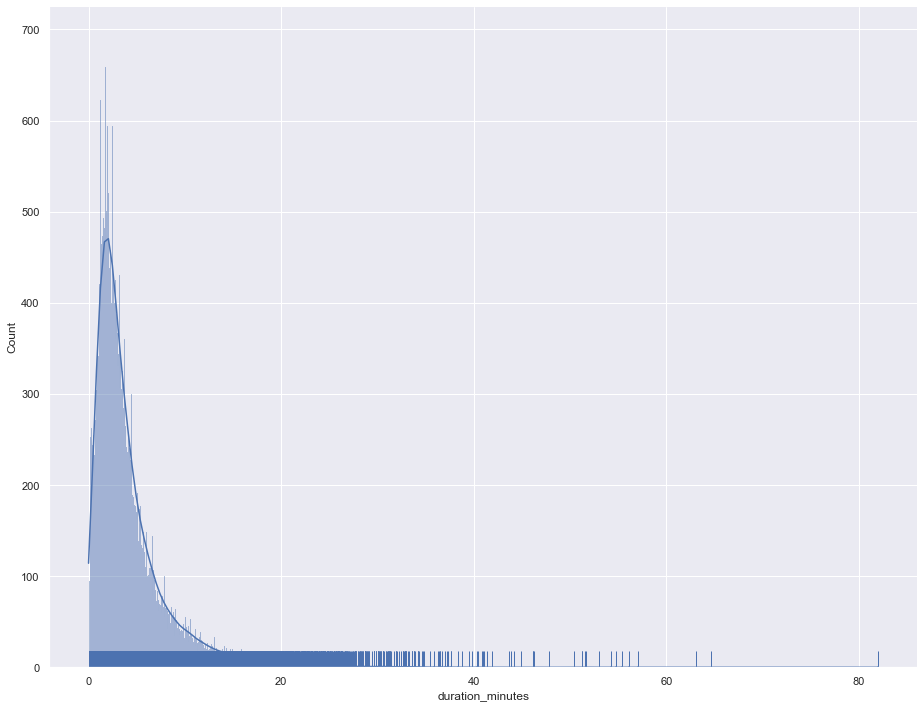

In [51]:
sns.displot(data = df, x = df.duration_minutes, height = 10, aspect = 1.3, rug = True, kde = True, bins = df.duration_minutes.nunique());

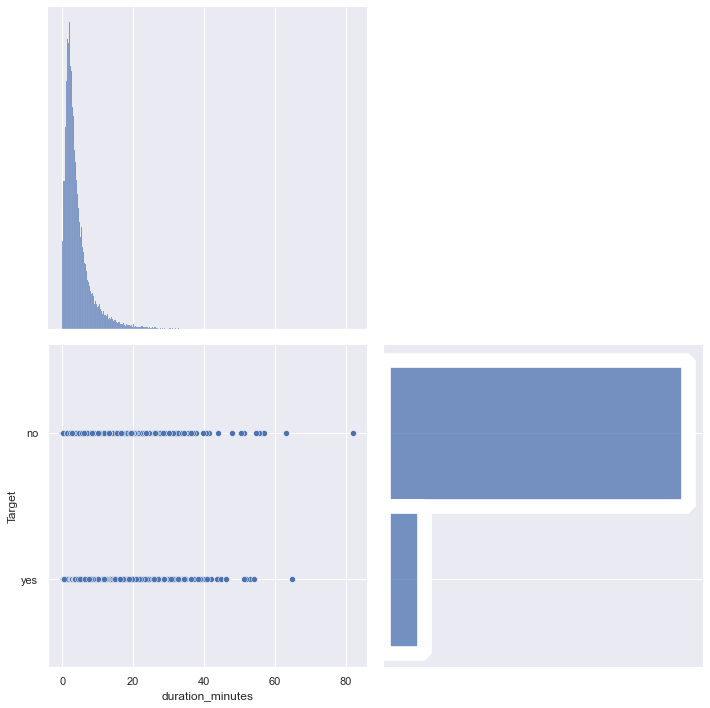

In [52]:
sns.jointplot(data = df, x = 'duration_minutes', y = 'Target', height = 10, space = .05, ratio = 1);

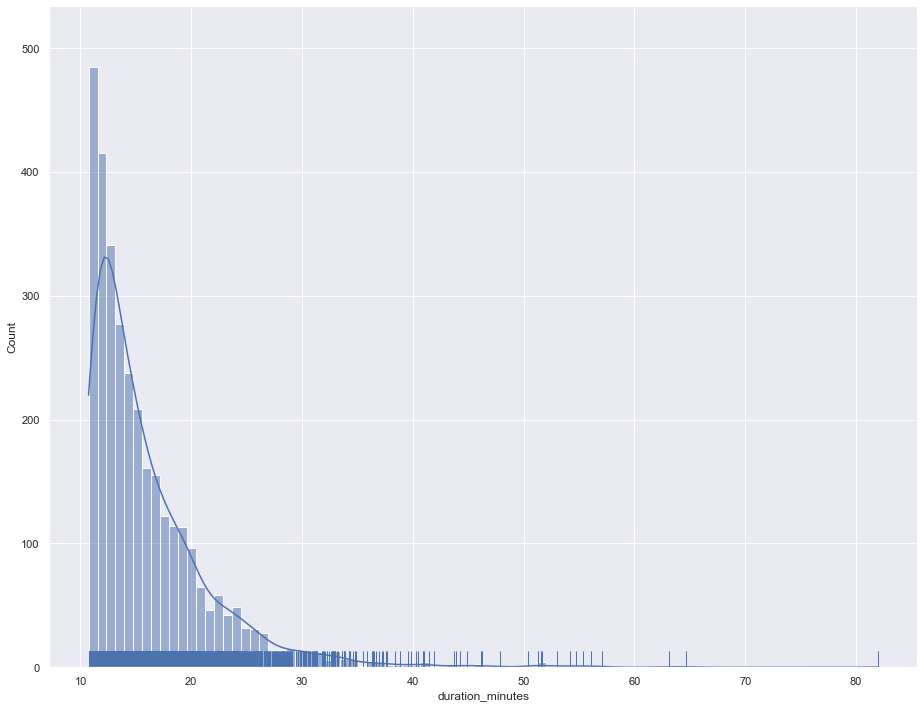

In [53]:
duration_outliers = df[df.duration_minutes > df.duration_minutes.quantile(.75) + 1.5*(df.duration_minutes.quantile(.75)-df.duration_minutes.quantile(.25))]
sns.displot(data = duration_outliers, x = duration_outliers.duration_minutes, height = 10, aspect = 1.3, rug = True, kde = True);

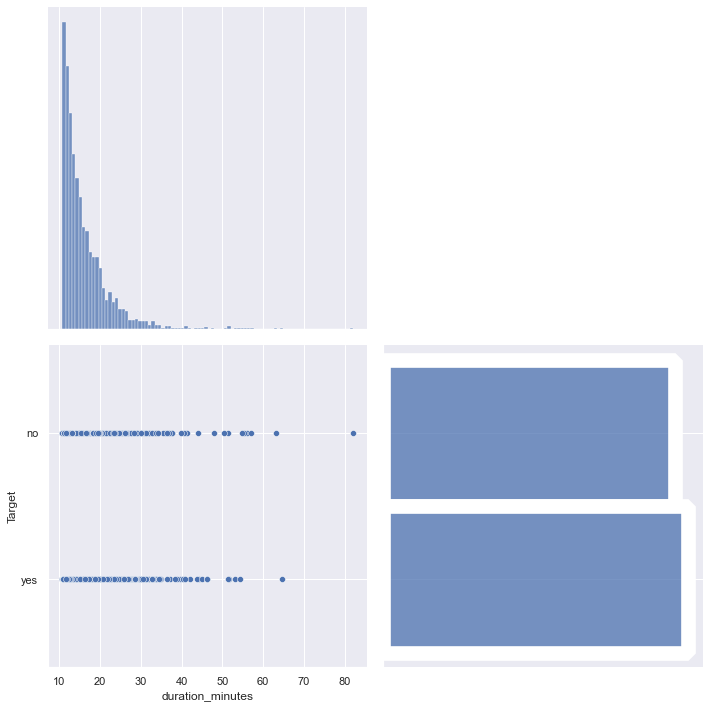

In [54]:
sns.jointplot(data = duration_outliers, x = 'duration_minutes', y = 'Target', height = 10, space = .05, ratio = 1);

### The 'Duration' attribute is right skewed and we observe a more even distribution between our Target variable and the outlying data than the data as a whole has.

# Campaign Attribute

Mean:
	 2.763840658246887

Median:

	 2.0

Standard Deviation:

	 3.0980208832802205

Quartiles:

	 Q1: 1.0 
	 Q2/Median: 2.0 
	 Q3: 3.0 
	 IQR: 2.0

Min/Max:

	 1 / 63


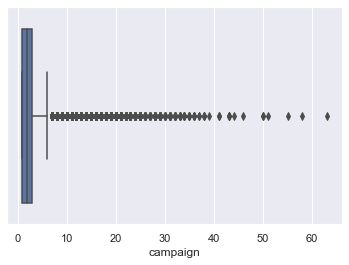

In [55]:
print('Mean:')
print('\t', df.campaign.mean())
print()
print('Median:')
print()
print('\t', df.campaign.median())
print()
print('Standard Deviation:')
print()
print('\t', df.campaign.std())
print()
print('Quartiles:')
print()
print('\t Q1:', df.campaign.quantile(.25),'\n\t Q2/Median:', df.campaign.quantile(.5), '\n\t Q3:', df.campaign.quantile(.75),
      '\n\t IQR:', df.campaign.quantile(.75)-df.campaign.quantile(.25))
print()
print('Min/Max:')
print()
print('\t',df.campaign.min(), '/', df.campaign.max())
sns.boxplot(data = df, x = df.campaign);

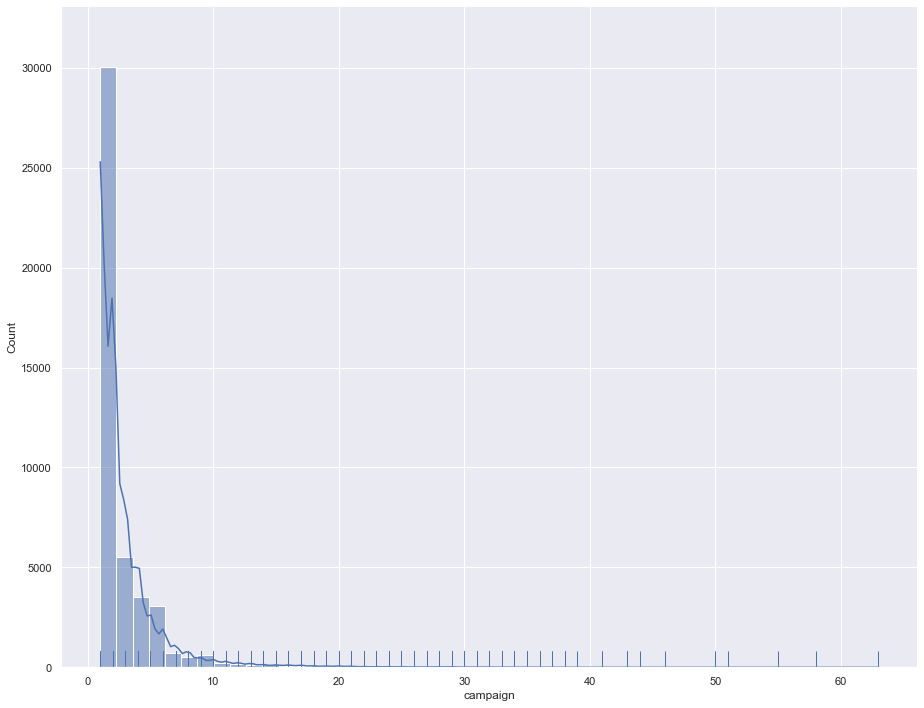

In [56]:
sns.displot(data = df, x = df.campaign, height = 10, aspect = 1.3, rug = True, kde = True, bins = df.campaign.nunique());

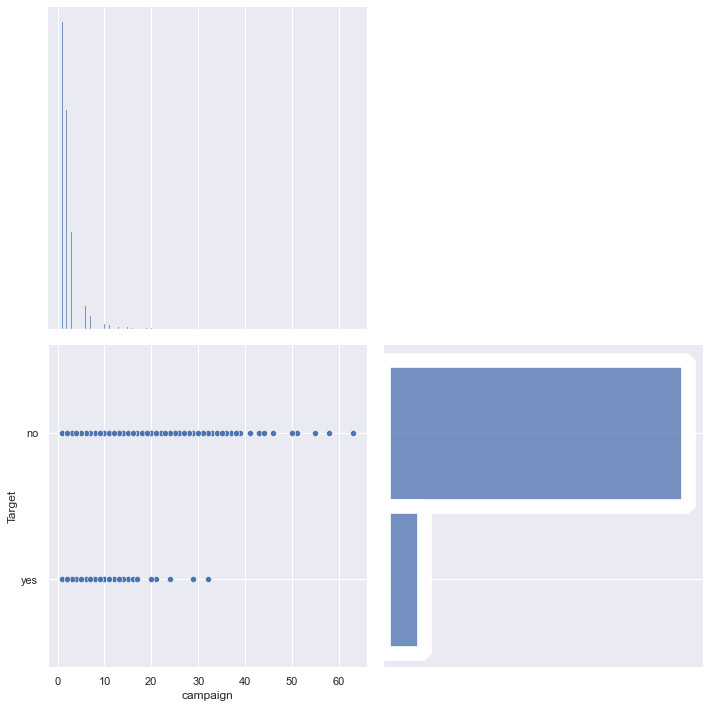

In [57]:
sns.jointplot(data = df, x = 'campaign', y = 'Target', height = 10, space = .05, ratio = 1);

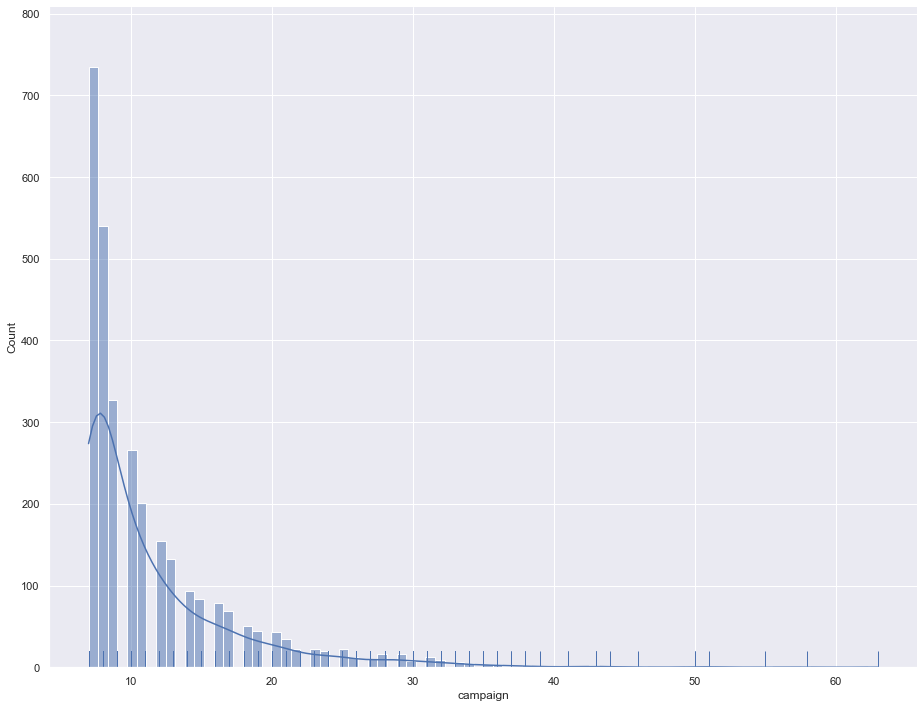

In [58]:
campaign_outliers = df[df.campaign > df.campaign.quantile(.75) + 1.5*(df.campaign.quantile(.75)-df.campaign.quantile(.25))]
sns.displot(data = campaign_outliers, x = campaign_outliers.campaign, height = 10, aspect = 1.3, rug = True, kde = True);

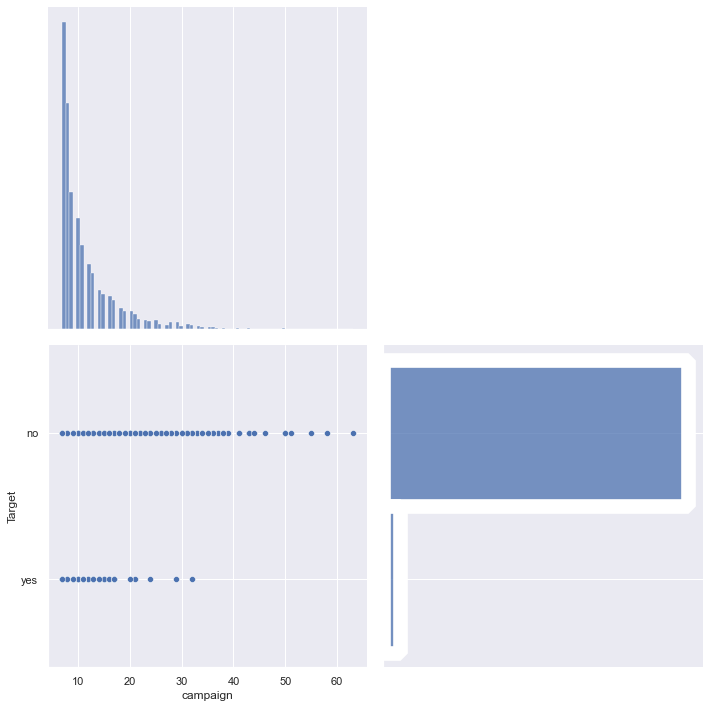

In [59]:
sns.jointplot(data = campaign_outliers, x = 'campaign', y = 'Target', height = 10, space = .05, ratio = 1);

### The 'Campaign' attribute is skewed right.  We see an interesting inverse relationship between the number of calls to the client and the likelyhood of a success. This suggests an inverse relationship between the amount of calls a client receives and their likelyhood of signing up for a term loan.  We will preserve this data as is, since this is likely an actual representation of the campaign.

# PDays Attribute

Mean:
	 40.19782796222158

Median:

	 -1.0

Standard Deviation:

	 100.1287459906047

Quartiles:

	 Q1: -1.0 
	 Q2/Median: -1.0 
	 Q3: -1.0 
	 IQR: 0.0

Min/Max:

	 -1 / 871


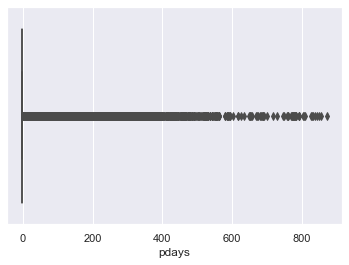

In [60]:
print('Mean:')
print('\t', df.pdays.mean())
print()
print('Median:')
print()
print('\t', df.pdays.median())
print()
print('Standard Deviation:')
print()
print('\t', df.pdays.std())
print()
print('Quartiles:')
print()
print('\t Q1:', df.pdays.quantile(.25),'\n\t Q2/Median:', df.pdays.quantile(.5), '\n\t Q3:', df.pdays.quantile(.75),
      '\n\t IQR:', df.pdays.quantile(.75)-df.pdays.quantile(.25))
print()
print('Min/Max:')
print()
print('\t',df.pdays.min(), '/', df.pdays.max())
sns.boxplot(data = df, x = df.pdays);

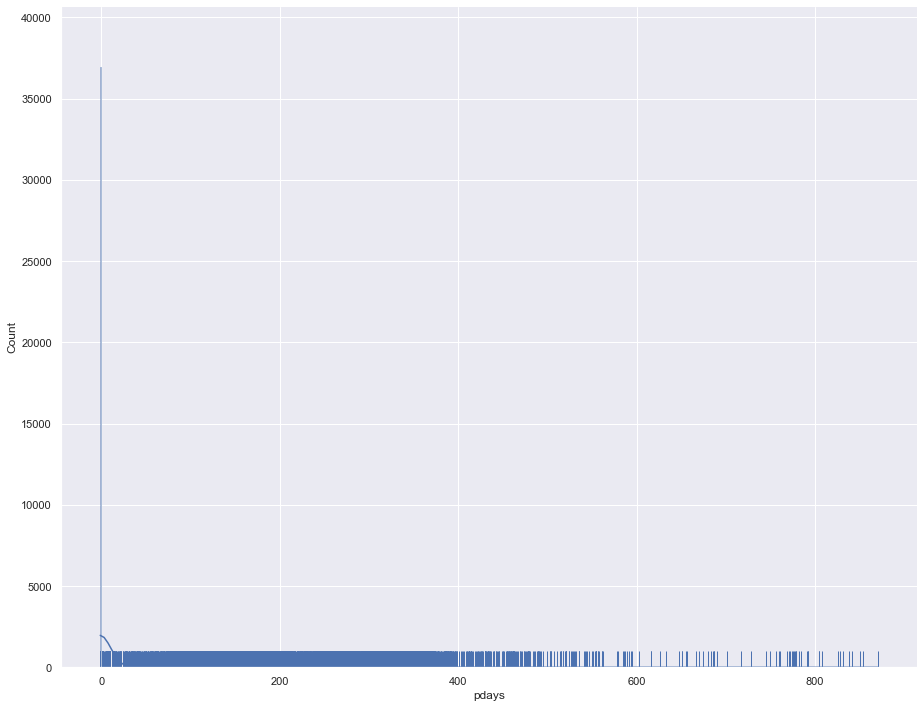

In [61]:
sns.displot(data = df, x = df.pdays, height = 10, aspect = 1.3, rug = True, kde = True, bins = df.pdays.nunique());

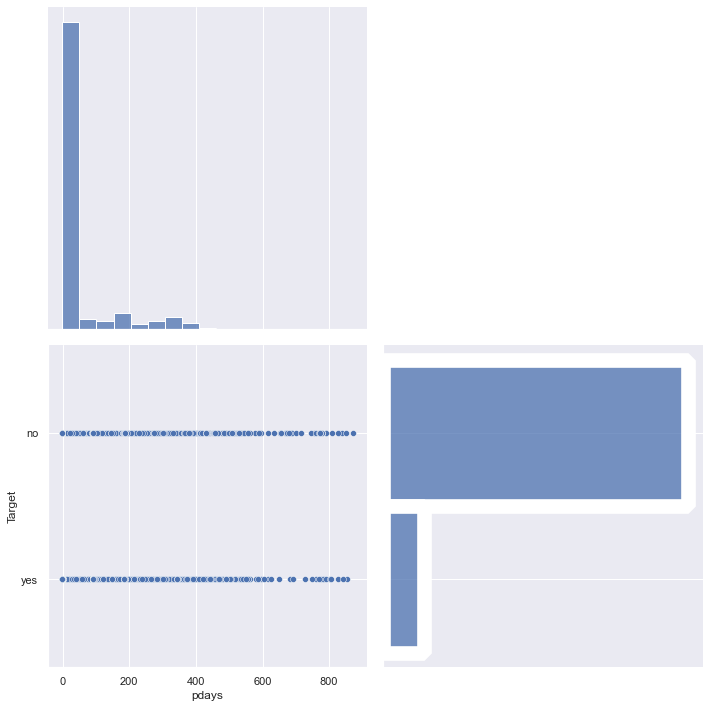

In [62]:
sns.jointplot(data = df, x = 'pdays', y = 'Target', height = 10, space = .05, ratio = 1);

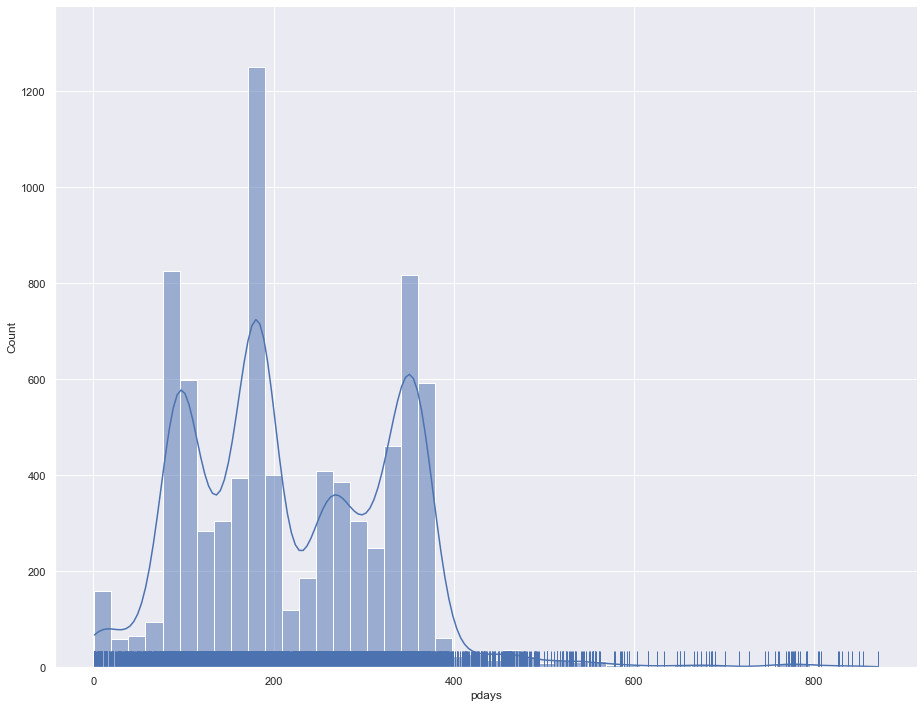

In [63]:
pdays_outliers = df[df.pdays > df.pdays.quantile(.75) + 1.5*(df.pdays.quantile(.75)-df.pdays.quantile(.25))]
sns.displot(data = pdays_outliers, x = 'pdays', height = 10, aspect = 1.3, rug = True, kde = True);

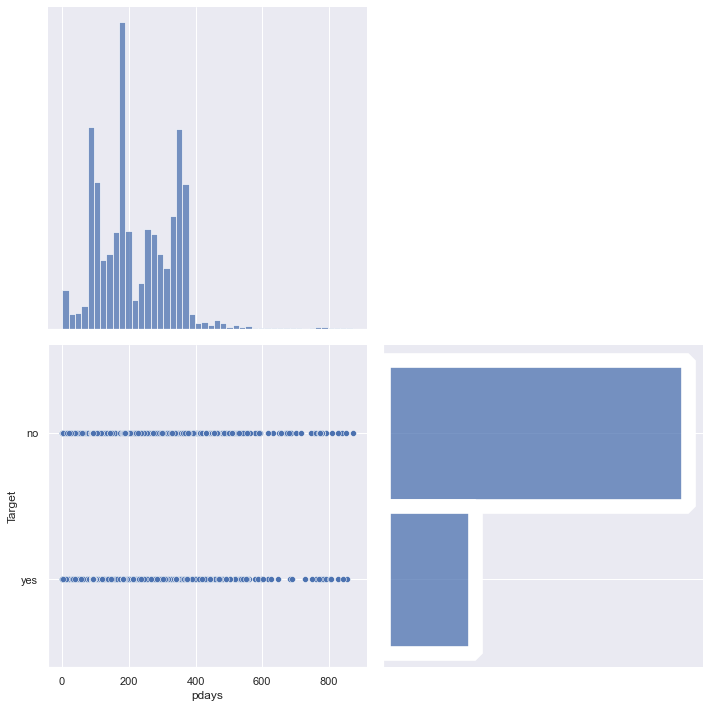

In [64]:
sns.jointplot(data = pdays_outliers, x = 'pdays', y = 'Target', height = 10, space = .05, ratio = 1);

### The 'Pdays' attribute is right skewed.  The outliers are not very evenly distributed but we do see an increase in successes. Because of this highly skewed attribute, we will modify the data to represent varying degrees of time passed before receiving another call.  This should be able to better inform the campaign regarding if contacting the client is preferable or not, and whether this lapse in time has any affect.

In [65]:
df['previously_contacted'] = df.pdays
for i in df.index:
    if df['previously_contacted'].iloc[i] != -1:
        df['previously_contacted'].iloc[i] = 1
    else:
        df['previously_contacted'].iloc[i] = 0

# Previous Attribute

Mean:
	 0.5803233726305546

Median:

	 0.0

Standard Deviation:

	 2.3034410449314233

Quartiles:

	 Q1: 0.0 
	 Q2/Median: 0.0 
	 Q3: 0.0 
	 IQR: 0.0

Min/Max:

	 0 / 275


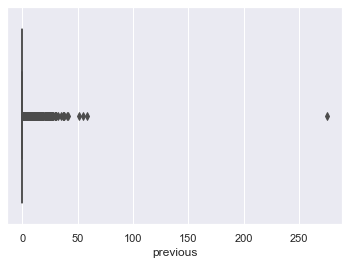

In [66]:
print('Mean:')
print('\t', df.previous.mean())
print()
print('Median:')
print()
print('\t', df.previous.median())
print()
print('Standard Deviation:')
print()
print('\t', df.previous.std())
print()
print('Quartiles:')
print()
print('\t Q1:', df.previous.quantile(.25),'\n\t Q2/Median:', df.previous.quantile(.5), '\n\t Q3:', df.previous.quantile(.75),
      '\n\t IQR:', df.previous.quantile(.75)-df.previous.quantile(.25))
print()
print('Min/Max:')
print()
print('\t',df.previous.min(), '/', df.previous.max())
sns.boxplot(data = df, x = df.previous);

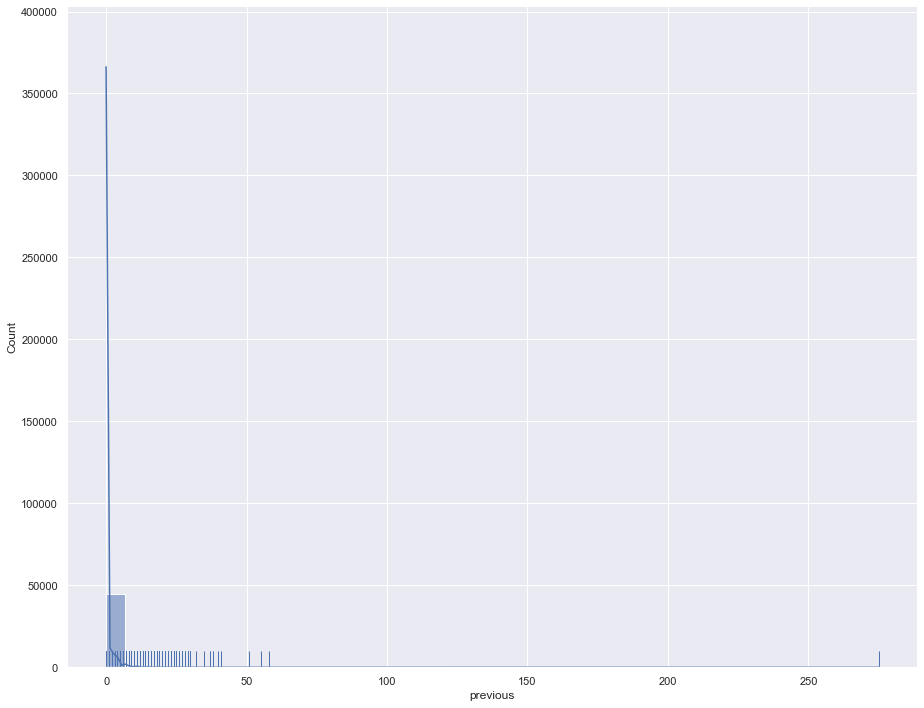

In [67]:
sns.displot(data = df, x = df.previous, height = 10, aspect = 1.3, rug = True, kde = True, bins = df.previous.nunique());

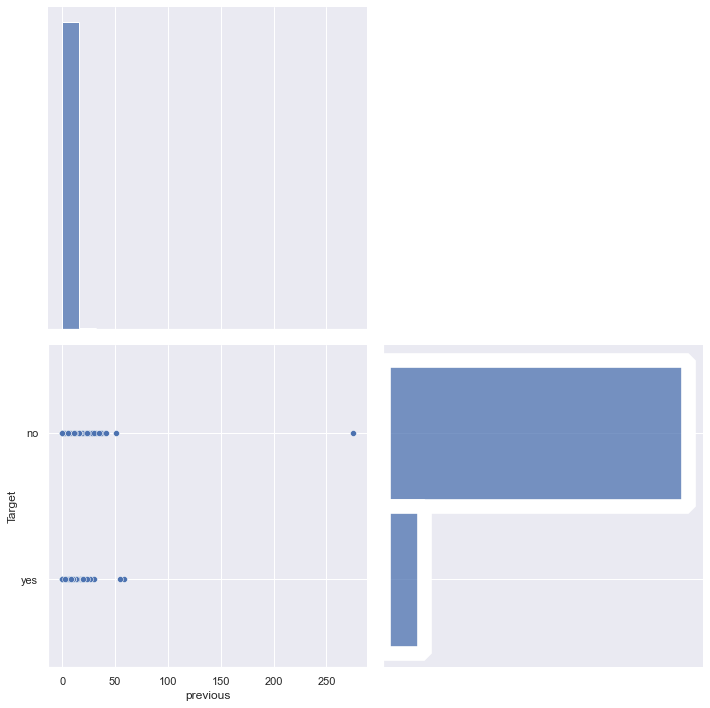

In [68]:
sns.jointplot(data = df, x = 'previous', y = 'Target', height = 10, space = .05, ratio = 1);

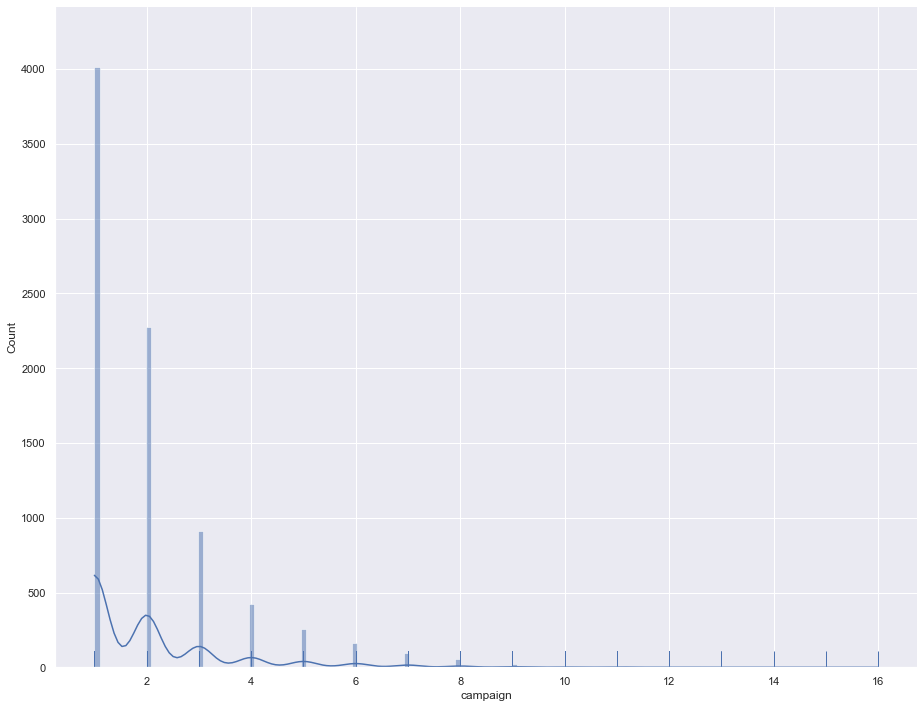

In [69]:
previous_outliers = df[df.previous > df.previous.quantile(.75) + 1.5*(df.previous.quantile(.75)-df.previous.quantile(.25))]
sns.displot(data = previous_outliers, x = previous_outliers.campaign, height = 10, aspect = 1.3, rug = True, kde = True);

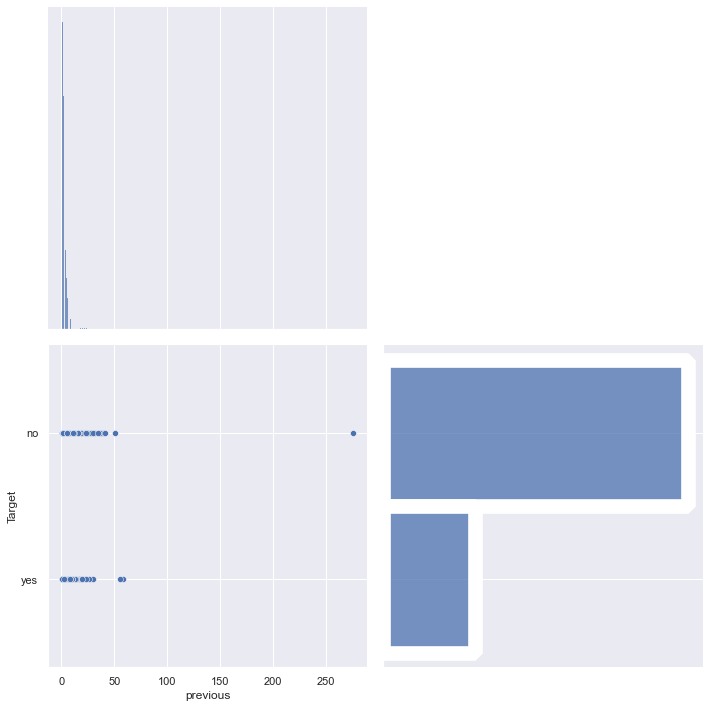

In [70]:
sns.jointplot(data = previous_outliers, x = 'previous', y = 'Target', height = 10, space = .05, ratio = 1);

### The 'Previous' attribute is right skewed.  Because of this highly skewed attribute, we will modify the data to delineate whether a client was or wasn't contacted previous to the last campaign. For this reason we do not need to remove the extreme outlier.

In [71]:
for i in df.index:
    if df['previous'].iloc[i] > 1:
        df['previous'].iloc[i] = 1

# Pairplot and Correlation Heatmaps

In [72]:
target = {
    'yes': 1,
    'no': 0
}

df_copy['Target'] = df_copy['Target'].apply(lambda x: target[x])  
df['Target'] = df['Target'].apply(lambda x: target[x])  

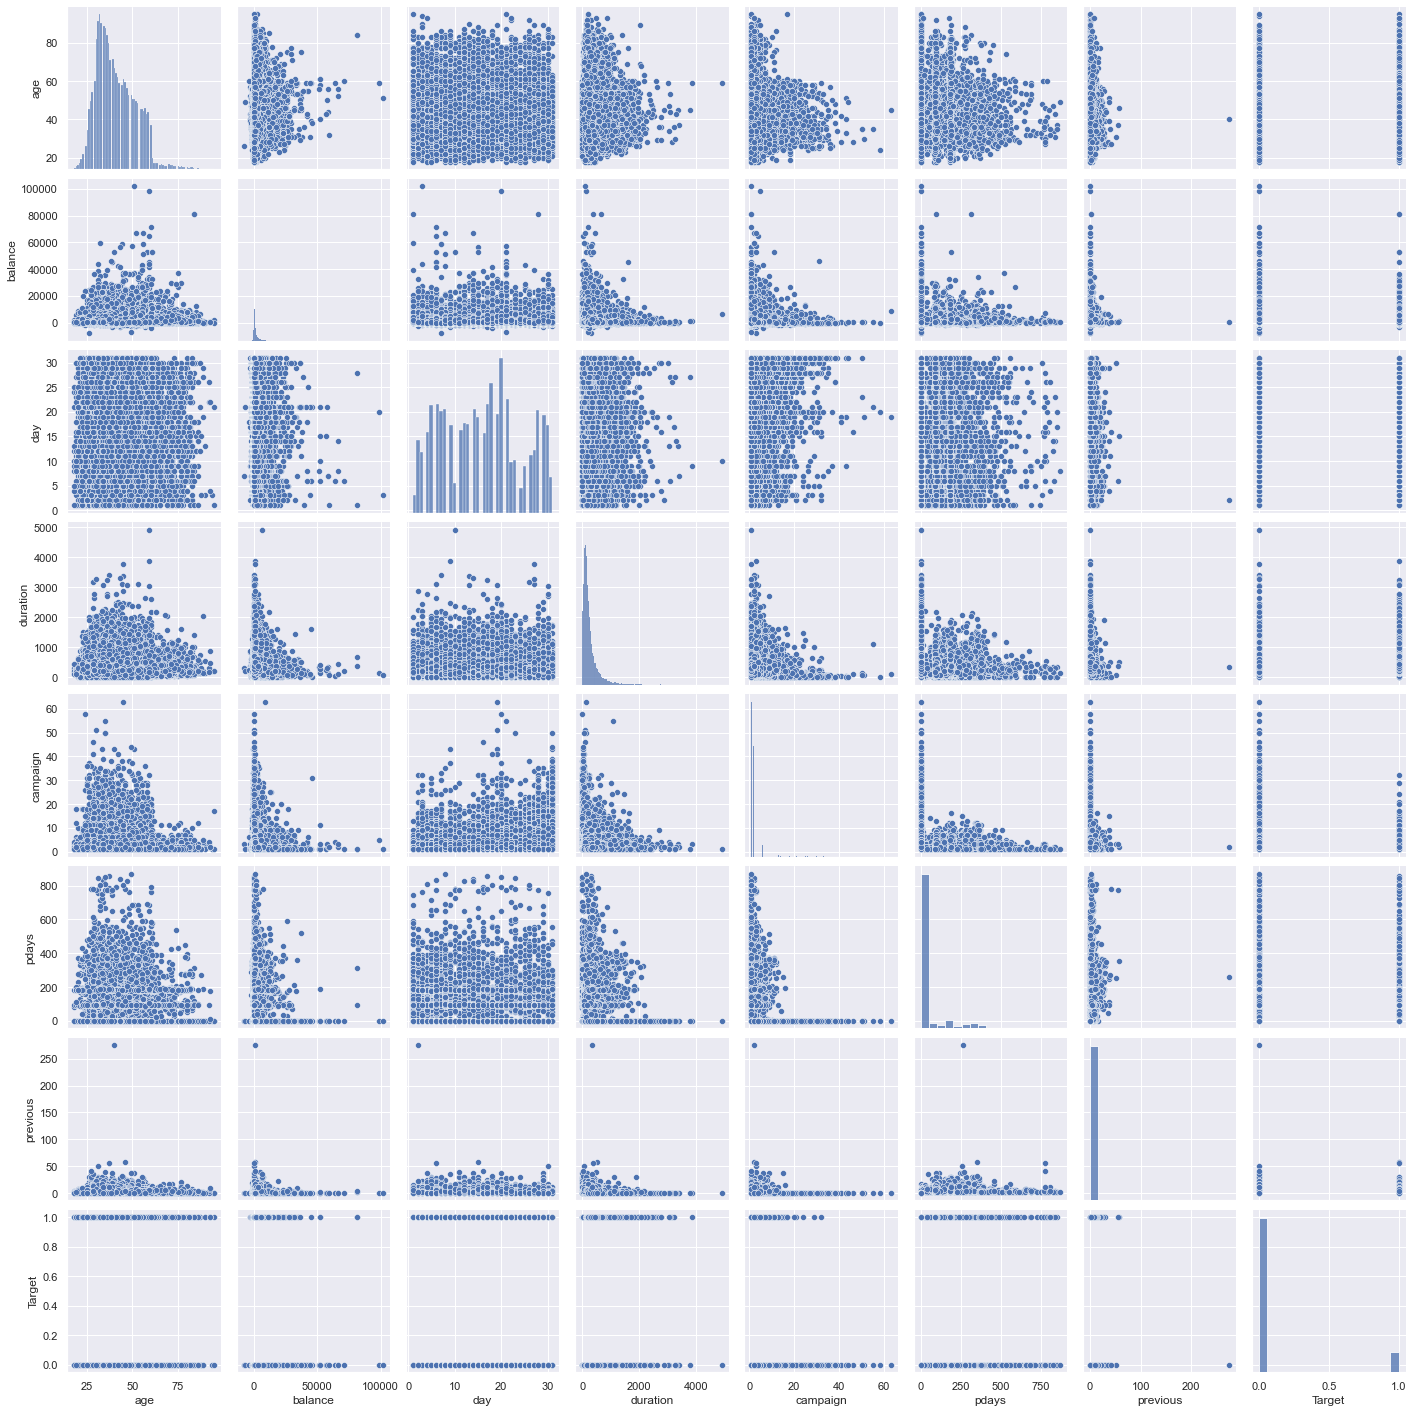

In [73]:
sns.pairplot(data = df_copy);

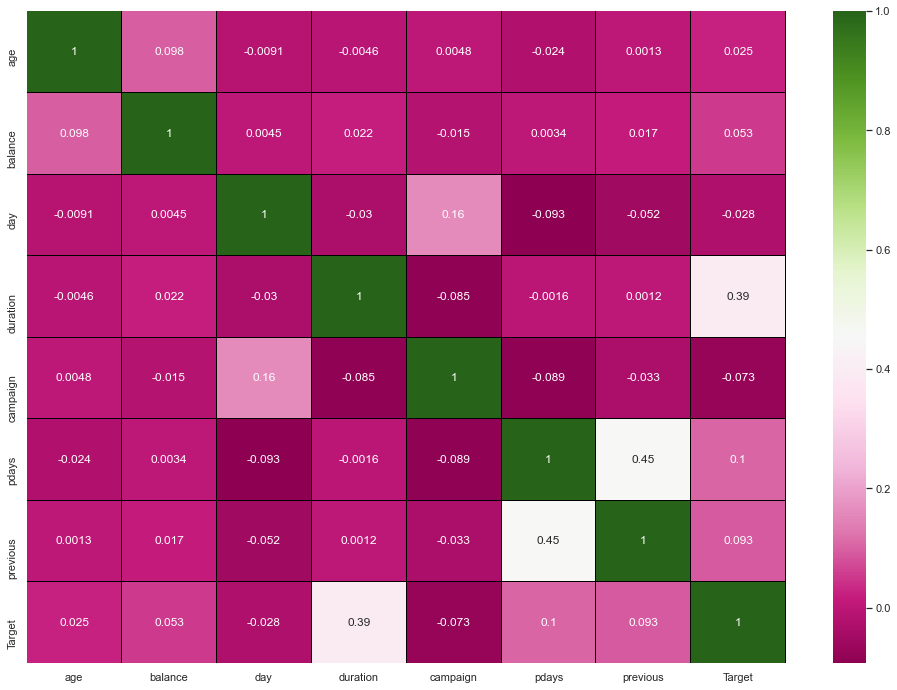

In [74]:
fig, ax = plt.subplots(figsize=(17,12)) 
sns.heatmap(df_copy.corr(), annot = True, cmap="PiYG", linewidths = .009, linecolor = 'black');

## Observing the heatmap of correlation, we do not see any strong correlation between any of the continous attributes, nothing strong enough to warrant dropping it.

## Categorical Variables Analysis


job

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
unemployed       1591
self-employed    1579
entrepreneur     1487
housemaid        1240
student           938
Name: job, dtype: int64

------------------------------

Target            0     1
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1355   236

------------------------------

Target             0      1
job                        
admin.        0.8780 0.1220
blue-collar   0.9273 0.0727
entrepreneur  0.9173 0.0827
housemaid     0.9121 0.0879
management    0.8624 0.1376
retired       0.7721 0.2279
self-employed 0.8816 0.1184
services      0.9112 0.0888
student       0.7132 0.2868
technician    0.

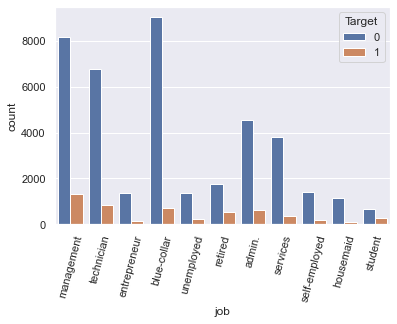

******************************

marital

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

------------------------------

Target        0     1
marital              
divorced   4585   622
married   24459  2755
single    10878  1912

------------------------------

Target        0      1
marital               
divorced 0.8805 0.1195
married  0.8988 0.1012
single   0.8505 0.1495


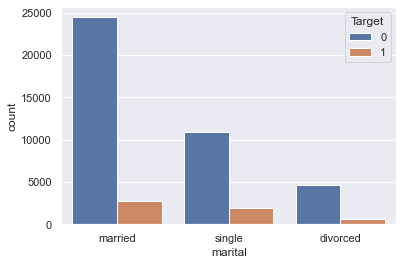

******************************

education

secondary    23202
tertiary     13301
primary       8708
Name: education, dtype: int64

------------------------------

Target         0     1
education             
primary     7865   843
secondary  20752  2450
tertiary   11305  1996

------------------------------

Target         0      1
education              
primary   0.9032 0.0968
secondary 0.8944 0.1056
tertiary  0.8499 0.1501


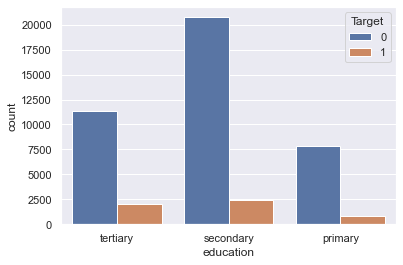

******************************

default

no     44396
yes      815
Name: default, dtype: int64

------------------------------

Target       0     1
default             
no       39159  5237
yes        763    52

------------------------------

Target       0      1
default              
no      0.8820 0.1180
yes     0.9362 0.0638


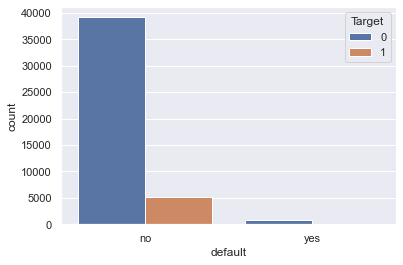

******************************

housing

yes    25130
no     20081
Name: housing, dtype: int64

------------------------------

Target       0     1
housing             
no       16727  3354
yes      23195  1935

------------------------------

Target       0      1
housing              
no      0.8330 0.1670
yes     0.9230 0.0770


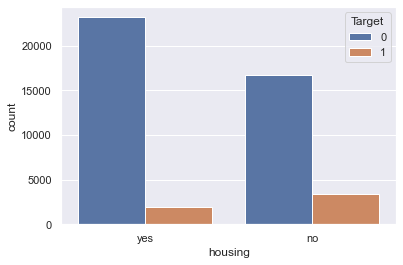

******************************

loan

no     37967
yes     7244
Name: loan, dtype: int64

------------------------------

Target      0     1
loan               
no      33162  4805
yes      6760   484

------------------------------

Target      0      1
loan                
no     0.8734 0.1266
yes    0.9332 0.0668


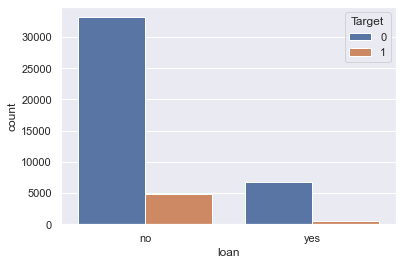

******************************

month

05    13766
07     6895
08     6247
06     5341
11     3970
04     2932
02     2649
01     1403
10      738
09      579
03      477
12      214
Name: month, dtype: int64

------------------------------

Target      0    1
month             
01       1261  142
02       2208  441
03        229  248
04       2355  577
05      12841  925
06       4795  546
07       6268  627
08       5559  688
09        310  269
10        415  323
11       3567  403
12        114  100

------------------------------

Target      0      1
month               
01     0.8988 0.1012
02     0.8335 0.1665
03     0.4801 0.5199
04     0.8032 0.1968
05     0.9328 0.0672
06     0.8978 0.1022
07     0.9091 0.0909
08     0.8899 0.1101
09     0.5354 0.4646
10     0.5623 0.4377
11     0.8985 0.1015
12     0.5327 0.4673


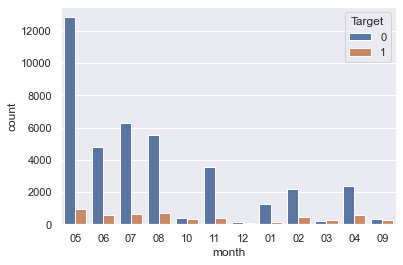

******************************

last_day_of_week

3    9754
0    9522
2    8914
4    8707
1    8264
5      30
6      20
Name: last_day_of_week, dtype: int64

------------------------------

Target               0     1
last_day_of_week            
0                 8554   968
1                 7246  1018
2                 7828  1086
3                 8532  1222
4                 7719   988
5                   27     3
6                   16     4

------------------------------

Target                0      1
last_day_of_week              
0                0.8983 0.1017
1                0.8768 0.1232
2                0.8782 0.1218
3                0.8747 0.1253
4                0.8865 0.1135
5                0.9000 0.1000
6                0.8000 0.2000


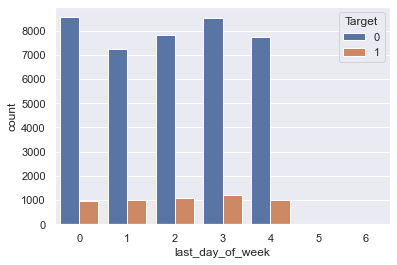

******************************

previous_day_of_week

-1    36954
 3     1733
 0     1677
 1     1666
 2     1648
 4     1526
 6        4
 5        3
Name: previous_day_of_week, dtype: int64

------------------------------

Target                    0     1
previous_day_of_week             
-1                    33570  3384
 0                     1256   421
 1                     1272   394
 2                     1297   351
 3                     1327   406
 4                     1196   330
 5                        2     1
 6                        2     2

------------------------------

Target                    0      1
previous_day_of_week              
-1                   0.9084 0.0916
 0                   0.7490 0.2510
 1                   0.7635 0.2365
 2                   0.7870 0.2130
 3                   0.7657 0.2343
 4                   0.7837 0.2163
 5                   0.6667 0.3333
 6                   0.5000 0.5000


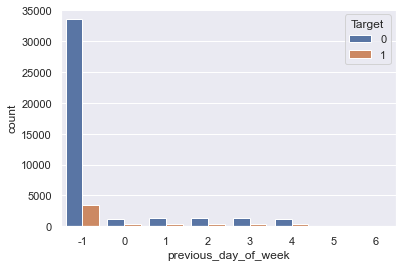

******************************

poutcome

other      38799
failure     4901
success     1511
Name: poutcome, dtype: int64

------------------------------

Target        0     1
poutcome             
failure    4283   618
other     35106  3693
success     533   978

------------------------------

Target        0      1
poutcome              
failure  0.8739 0.1261
other    0.9048 0.0952
success  0.3527 0.6473


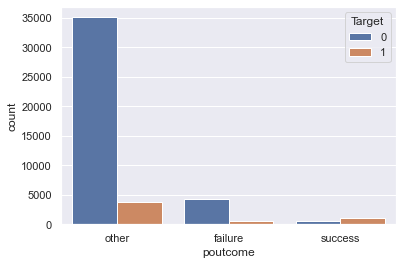

******************************


In [75]:
plt.xticks(rotation=75)
for i in df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'last_day_of_week', 'previous_day_of_week', 'poutcome']]:
    print()
    print(i)
    print()
    print(df[i].value_counts(ascending = False))
    print()
    print('------------------------------')
    print()
    print(pd.crosstab(df[i], df['Target']))
    print()
    print('------------------------------')
    print()
    print(pd.crosstab(df[i], df['Target'], normalize = 'index'))
    sns.countplot(data = df, x = i, hue = 'Target');
    plt.show()
    
    
    
    print('******************************')

### Looking at the above data, it would appear that we can imagine what our perfect client would look like.  They would be single, either a student or retired with the highest level of education, with no loans or credit defaults, who had been called last during the month of March and has previously activated a term deposit.  We can imagine this by taking the greatest percentage of success from each attribute and putting them all together. 

# Converting our Categorical Variables by Assigning Values for Machine Learning

### 'Education'

In [76]:
edu = {
    'primary': 1,
    'secondary': 2,
    'tertiary': 3
}

df['education'] = df['education'].apply(lambda x: edu[x])  

### 'Default'

In [77]:
io = {
    'yes': 1,
    'no': 0
}

df['default'] = df['default'].apply(lambda x: io[x])  

### 'Housing'

In [78]:
df['housing'] = df['housing'].apply(lambda x: io[x])  

### 'Loan'

In [79]:
df['loan'] = df['loan'].apply(lambda x: io[x])  

# Removal of Insignificant Attributes

In [80]:
df.drop('id', axis = 1, inplace = True)

### Removing 'Duration' & 'Duration_Minutes' attributes as to have a realistic predictive model

In [81]:
df.drop('duration', axis = 1, inplace = True)
df.drop('duration_minutes', axis = 1, inplace = True)

### We drop 'Pdays' attribute having replaced with 'Previously_Contacted'

In [82]:
df.drop('pdays', axis = 1, inplace = True)

### We drop 'Last_Contacted' & 'Year' since we achieved 'Last_Day_Of_Week'

In [83]:
df.drop('last_contacted', axis = 1, inplace = True)
df.drop('year', axis = 1, inplace = True)

### We drop 'Previous_Day_Of_Week' and 'Previous_Contacted' as this information is highly unknown

In [84]:
df.drop('previous_day_of_week', axis = 1, inplace = True)
df.drop('previous_contacted', axis = 1, inplace = True)

### We drop 'Day' since this data is somewhat arbitrary and we have 'Last_Day_Of_Week'

In [85]:
df.drop('day', axis = 1, inplace = True)

### We drop 'Age' attribute since we have 'Age_Group'

In [86]:
df.drop('age', axis = 1, inplace = True)

### We drop the 'Month' Attribute since this data is not equally distributed and overly weighed towards April in the first year

In [87]:
df.drop('month', axis = 1, inplace = True)

### We convert 'Age_Group' to an integer to represent the continuity of age

In [88]:
df.age_group = df.age_group.astype('int')

In [89]:
df.dtypes

job                     object
marital                 object
education                int64
default                  int64
balance                  int64
housing                  int64
loan                     int64
campaign                 int64
previous                 int64
poutcome                object
Target                   int64
last_day_of_week         int64
age_group                int64
previously_contacted     int64
dtype: object

In [90]:
df.head()

,job,marital,education,default,balance,housing,loan,campaign,previous,poutcome,Target,last_day_of_week,age_group,previously_contacted
0,management,married,3,0,2143,1,0,1,0,other,0,0,4,0
1,technician,single,2,0,29,1,0,1,0,other,0,0,3,0
2,entrepreneur,married,2,0,2,1,1,1,0,other,0,0,2,0
3,blue-collar,married,1,0,1506,1,0,1,0,other,0,0,3,0
4,unemployed,single,1,0,1,0,0,1,0,other,0,0,2,0


# One Hot Encoding

In [91]:
df = pd.get_dummies(df, drop_first = True)

# Splitting the Data

In [92]:
features = [col for col in df.columns if col != 'Target']

X_train, X_test, y_train, y_test = train_test_split(df[features], df['Target'], test_size=.3, random_state=42)
X_train.shape, X_test.shape

((31647, 24), (13564, 24))

# Confusion Matrix Function

In [93]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

# Logistic Regression

In [94]:
logreg = LogisticRegression(random_state=42, fit_intercept=False)
logreg.fit(X_train, y_train) 
y_predict = logreg.predict(X_test)  


TRAINING ACCURACY: 0.8888046260309034

TESTING ACCURACY: 0.8874963137717488

CONFUSION MATRIX:


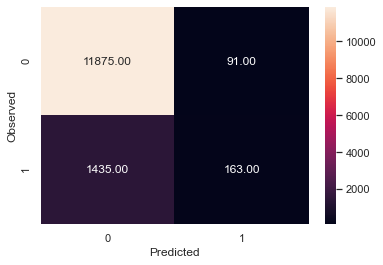


RECALL: 0.10200250312891114

PRECISION: 0.6417322834645669

F1 SCORE: 0.17602591792656588


In [95]:
print()
print('TRAINING ACCURACY:', logreg.score(X_train,y_train))  
print()
print('TESTING ACCURACY:', logreg.score(X_test, y_test))
print()
print('CONFUSION MATRIX:')
draw_cm(y_test,y_predict)
print()
print('RECALL:', recall_score(y_test,y_predict))
print()
print('PRECISION:', precision_score(y_test,y_predict))
print()
print('F1 SCORE:', f1_score(y_test,y_predict))


tlogacc = logreg.score(X_train,y_train)
logacc = logreg.score(X_test, y_test)
logrec = recall_score(y_test,y_predict)
logP = precision_score(y_test,y_predict)
logF = f1_score(y_test,y_predict)


In [96]:
results = pd.DataFrame({'Method':['Log Reg'], 'Train Accuracy': tlogacc, 'Test Accuracy': logacc,
                        'Recall': logrec, 'Precision': logP, 'F1 Score': logF})
results = results[['Method', 'Train Accuracy', 'Test Accuracy', 'Recall', 'Precision', 'F1 Score']]


# Decision Tree

In [97]:
g_clf = DecisionTreeClassifier(criterion = "gini", max_depth=3, random_state = 42)
g_clf.fit(X_train, y_train)
y_predict = g_clf.predict(X_test) 


TRAINING ACCURACY: 0.8940815875122444

TESTING ACCURACY: 0.8925095841934533

CONFUSION MATRIX:


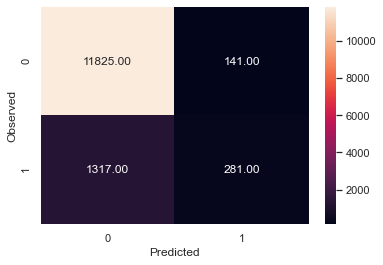


RECALL: 0.17584480600750937

PRECISION: 0.6658767772511849

F1 SCORE: 0.2782178217821782


In [98]:
print()
print('TRAINING ACCURACY:', g_clf.score(X_train,y_train))  
print()
print('TESTING ACCURACY:', g_clf.score(X_test, y_test))
print()
print('CONFUSION MATRIX:')
draw_cm(y_test,y_predict)
print()
print('RECALL:', recall_score(y_test,y_predict))
print()
print('PRECISION:', precision_score(y_test,y_predict))
print()
print('F1 SCORE:', f1_score(y_test,y_predict))




tgclfacc = g_clf.score(X_train,y_train)
gclfacc = g_clf.score(X_test, y_test)
gclfrec = recall_score(y_test,y_predict)
gclfP = precision_score(y_test,y_predict)
gclfF = f1_score(y_test,y_predict)

In [99]:
tempResults = pd.DataFrame({'Method':['Decision Tree'], 'Train Accuracy': tgclfacc,
                            'Test Accuracy': gclfacc,'Recall': gclfrec, 'Precision': gclfP,
                            'F1 Score': gclfF})
results = pd.concat([results, tempResults])
results = results[['Method', 'Train Accuracy', 'Test Accuracy', 'Recall', 'Precision', 'F1 Score']]


## Looking at our Logistic Regression and Decision Tree models, we see varying degrees of our F1 Score, similar scores for Precision, and slightly less similar scores for Recall.  Both models are not overfitting, which is a good sign for our Logistic Regression, and was curtailed by the pruning of our decision tree.  As both models have a very similar accuracy, we have to rely on the falsely predicted observations in order to come to a stronger conclusion.  In my opinion, we see that not only does the Decision Tree perform more accurately, the higher Recall, Precision, and F1 Score values are present, showing that the model is better equipped to deal with falsely predicted observations.

# Feature Importance

In [100]:
feat_importance = g_clf.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(features, g_clf.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
poutcome_success,0.7642
age_group,0.1405
housing,0.0777
last_day_of_week,0.0097
campaign,0.0055
poutcome_other,0.0025
job_retired,0.0000
marital_single,0.0000
marital_married,0.0000
job_unemployed,0.0000


## Our important features are limited from our attributes that we fed into the models.  It is suprising to see that neither students nor retired job attributes make much of an appearance in this. The apparent winner is whether the client has successfully subscribed to a term loan in the past, followed by the age of the client.  This seems likely, and would suggest that a previous campaign was able to exceed these clients expectations and another strong successful campaign would be able to engender  even more business in the future. We also see that by determining the day of the week that the last call was made is a deciding factor in determining whether a client subscribed to the term deposit, which is validating.

# Random Forest

In [101]:
rfcl = RandomForestClassifier(n_estimators = 200, random_state = 42)
rfcl = rfcl.fit(X_train, y_train)
y_predict = rfcl.predict(X_test) 


TRAINING ACCURACY: 0.998578064271495

TESTING ACCURACY: 0.8787230905337658

CONFUSION MATRIX:


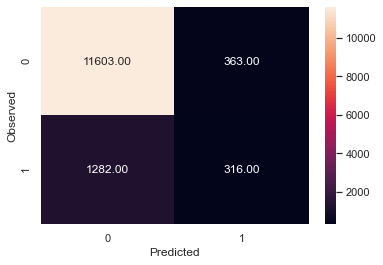


RECALL: 0.19774718397997496

PRECISION: 0.4653902798232695

F1 SCORE: 0.27755819060166886


In [102]:
print()
print('TRAINING ACCURACY:', rfcl.score(X_train,y_train))  
print()
print('TESTING ACCURACY:', rfcl.score(X_test, y_test))
print()
print('CONFUSION MATRIX:')
draw_cm(y_test,y_predict)
print()
print('RECALL:', recall_score(y_test,y_predict))
print()
print('PRECISION:', precision_score(y_test,y_predict))
print()
print('F1 SCORE:', f1_score(y_test,y_predict))




trfclacc= rfcl.score(X_train,y_train)
rfclacc= rfcl.score(X_test, y_test)
rfclrec= recall_score(y_test,y_predict)
rfclP= precision_score(y_test,y_predict)
rfclF= f1_score(y_test,y_predict)

In [103]:
tempResults = pd.DataFrame({'Method':['Random Forest'], 'Train Accuracy': trfclacc,
                            'Test Accuracy': rfclacc,'Recall': rfclrec, 
                            'Precision': rfclP, 'F1 Score': rfclF})
results = pd.concat([results, tempResults])
results = results[['Method', 'Train Accuracy', 'Test Accuracy', 'Recall', 'Precision', 'F1 Score']]


# AdaBoost

In [104]:
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.1, random_state = 42)
abcl = abcl.fit(X_train, y_train)
y_predict = abcl.predict(X_test) 


TRAINING ACCURACY: 0.8925964546402503

TESTING ACCURACY: 0.893246829843704

CONFUSION MATRIX:


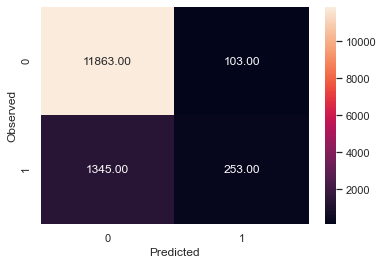


RECALL: 0.1583229036295369

PRECISION: 0.7106741573033708

F1 SCORE: 0.2589559877175025


In [105]:
print()
print('TRAINING ACCURACY:', abcl.score(X_train,y_train))  
print()
print('TESTING ACCURACY:', abcl.score(X_test, y_test))
print()
print('CONFUSION MATRIX:')
draw_cm(y_test,y_predict)
print()
print('RECALL:', recall_score(y_test,y_predict))
print()
print('PRECISION:', precision_score(y_test,y_predict))
print()
print('F1 SCORE:', f1_score(y_test,y_predict))




tabclacc= abcl.score(X_train,y_train)
abclacc= abcl.score(X_test, y_test)
abclrec= recall_score(y_test,y_predict)
abclP= precision_score(y_test,y_predict)
abclF= f1_score(y_test,y_predict)

In [106]:
tempResults = pd.DataFrame({'Method':['Ada Boost'], 'Train Accuracy': tabclacc, 'Test Accuracy': abclacc,
                        'Recall': abclrec, 'Precision': abclP, 'F1 Score': abclF})
results = pd.concat([results, tempResults])
results = results[['Method', 'Train Accuracy', 'Test Accuracy', 'Recall', 'Precision', 'F1 Score']]


# Bagging

In [107]:
bgcl = BaggingClassifier(n_estimators=100, max_samples= .7, bootstrap=True, oob_score=True, random_state=42)
bgcl = bgcl.fit(X_train, y_train)
y_predict = bgcl.predict(X_test) 


TRAINING ACCURACY: 0.983663538408064

TESTING ACCURACY: 0.8858006487761723

CONFUSION MATRIX:


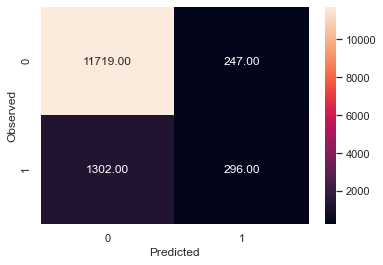


RECALL: 0.18523153942428036

PRECISION: 0.5451197053406999

F1 SCORE: 0.2765063054647361


In [108]:
print()
print('TRAINING ACCURACY:', bgcl.score(X_train,y_train))  
print()
print('TESTING ACCURACY:', bgcl.score(X_test, y_test))
print()
print('CONFUSION MATRIX:')
draw_cm(y_test,y_predict)
print()
print('RECALL:', recall_score(y_test,y_predict))
print()
print('PRECISION:', precision_score(y_test,y_predict))
print()
print('F1 SCORE:', f1_score(y_test,y_predict))




tbgclacc= bgcl.score(X_train,y_train)
bgclacc= bgcl.score(X_test, y_test)
bgclrec= recall_score(y_test,y_predict)
bgclP= precision_score(y_test,y_predict)
bgclF= f1_score(y_test,y_predict)

In [109]:
tempResults = pd.DataFrame({'Method':['Bagging'], 'Train Accuracy': tbgclacc, 'Test Accuracy': bgclacc,
                        'Recall': bgclrec, 'Precision': bgclP, 'F1 Score': bgclF})
results = pd.concat([results, tempResults])
results = results[['Method', 'Train Accuracy', 'Test Accuracy', 'Recall', 'Precision', 'F1 Score']]


# Gradient Boosting

In [110]:
gbcl = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state=42)
gbcl = gbcl.fit(X_train, y_train)
y_predict = gbcl.predict(X_test) 


TRAINING ACCURACY: 0.8949347489493474

TESTING ACCURACY: 0.8925833087584784

CONFUSION MATRIX:


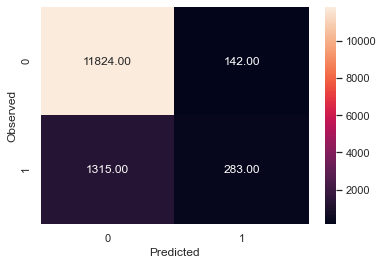


RECALL: 0.17709637046307886

PRECISION: 0.6658823529411765

F1 SCORE: 0.2797825012357884


In [111]:
print()
print('TRAINING ACCURACY:', gbcl.score(X_train,y_train))  
print()
print('TESTING ACCURACY:', gbcl.score(X_test, y_test))
print()
print('CONFUSION MATRIX:')
draw_cm(y_test,y_predict)
print()
print('RECALL:', recall_score(y_test,y_predict))
print()
print('PRECISION:', precision_score(y_test,y_predict))
print()
print('F1 SCORE:', f1_score(y_test,y_predict))




tgbclacc= gbcl.score(X_train,y_train)
gbclacc= gbcl.score(X_test, y_test)
gbclrec= recall_score(y_test,y_predict)
gbclP= precision_score(y_test,y_predict)
gbclF= f1_score(y_test,y_predict)

# Model Comparison

In [112]:
tempResults = pd.DataFrame({'Method':['Gradient Boosting'], 'Train Accuracy': tgbclacc, 'Test Accuracy': gbclacc,
                        'Recall': gbclrec, 'Precision': gbclP, 'F1 Score': gbclF})
results = pd.concat([results, tempResults])
results = results[['Method', 'Train Accuracy', 'Test Accuracy', 'Recall', 'Precision', 'F1 Score']]
results

,Method,Train Accuracy,Test Accuracy,Recall,Precision,F1 Score
0,Log Reg,0.8888,0.8875,0.1020,0.6417,0.1760
0,Decision Tree,0.8941,0.8925,0.1758,0.6659,0.2782
0,Random Forest,0.9986,0.8787,0.1977,0.4654,0.2776
0,Ada Boost,0.8926,0.8932,0.1583,0.7107,0.2590
0,Bagging,0.9837,0.8858,0.1852,0.5451,0.2765
0,Gradient Boosting,0.8949,0.8926,0.1771,0.6659,0.2798


# I would conclude that the best predective ensemble model is AdaBoosting.  As a business, a bank conducting this campaign needs to favor minimizing lost opportunities in the form of False Positives, than it would unexpected successes.  While we do see very similar performing accuracy scores across the models, we see the lowest levels of False Positives combined with very high False Negatives in AdaBoosting.  This model has the highest Precision score, so we know that it has the best positive predictive power over the total number of predicted positives. This balance of having a much better ability to have unexpected successes while being able to identify True Negatives as well as the other models would be the best fitting model for a bank that is trying to maximize the adoption of a campaign without overreaching.  It would seem counter-intuitive to favor a model that you know will be inaccurate, but in this case these inaccuracies work in our favor, and we allow our mistakes to work for us.